# Smart Factory Energy Prediction Challenge

<span style="color:#FFA500; font-size:20px;">
This Jupyter Notebook performs an analysis of the develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction..</span>


* Author:Mahalakshmi M
* Email:mahalakshmimageswaran@gmail.com
* Date:May 07,2025


### <span style="color:#003366; font-size:32px;">1. Data Loading </span>


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

### <span style="color:#083740; font-size:20px;">1.1  Data Loading</span>


In [16]:
try:
    df = pd.read_csv('D:\\Mechacademy\\DS-Intern-Assignment-Mahalakshmi\\data\\data.csv')
except FileNotFoundError:
    print("Error: data.csv not found in the data/ directory. Please ensure the file is present.")
    exit()


### <span style="color:#003366; font-size:32px;">2. Data preprocessing</span>


In [17]:
# ### 2.1. Basic Information
print("Shape of the dataframe:", df.shape)
print("\nFirst 5 rows of the dataframe:")
print(df.head())
print("\nInformation about the dataframe:")
df.info()
print("\nSummary statistics of the numerical features:")
print(df.describe())

Shape of the dataframe: (16857, 29)

First 5 rows of the dataframe:
             timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperatu

In [18]:
# ### 2.2. Handling Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826


In [19]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert the other object columns to float, coercing errors to NaN
columns_to_convert = ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity','zone2_temperature']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Let's check the data types now
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15993 non-null  float64       
 3   zone1_temperature             15908 non-null  float64       
 4   zone1_humidity                15969 non-null  float64       
 5   zone2_temperature             15934 non-null  float64       
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [20]:
# Impute missing values (if any) - using mean for numerical features
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variabl


3. Outlier Removal using IQR and Plotting:


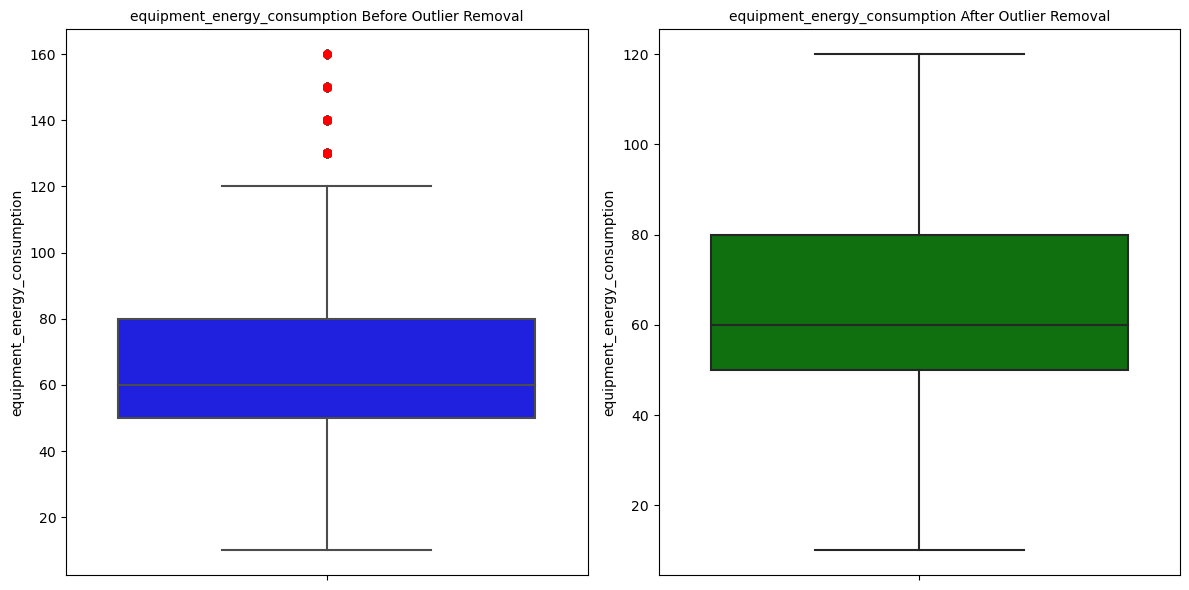

  - Outliers removed from 'equipment_energy_consumption' (108 data points) using IQR.
  - IQR is 0 for column 'lighting_energy'. Skipping outlier removal for this column.


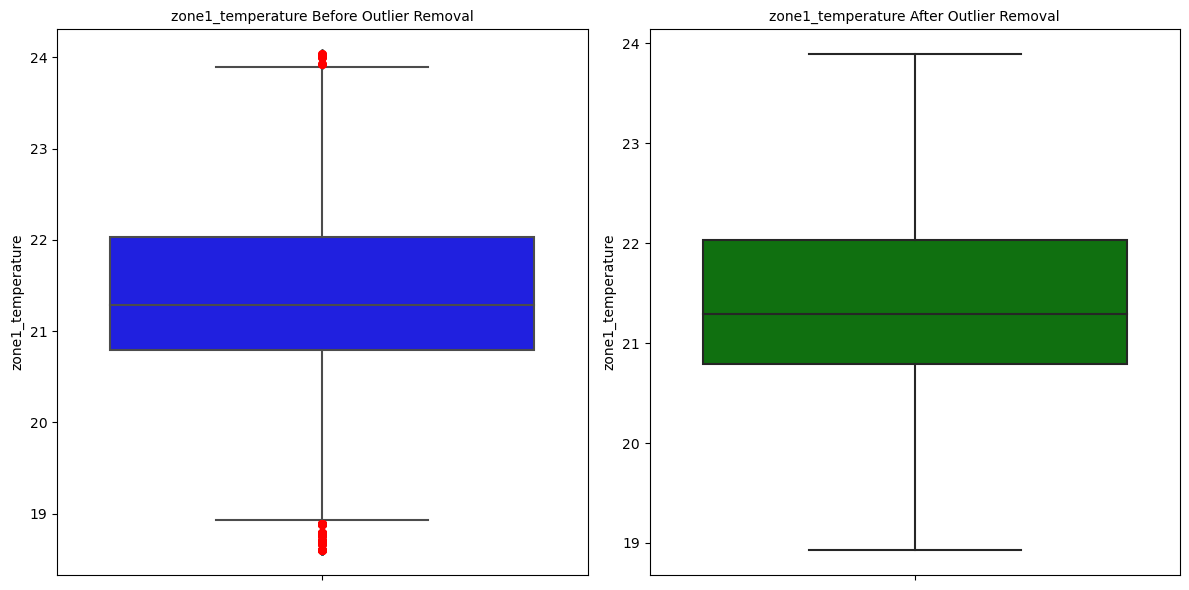

  - Outliers removed from 'zone1_temperature' (49 data points) using IQR.


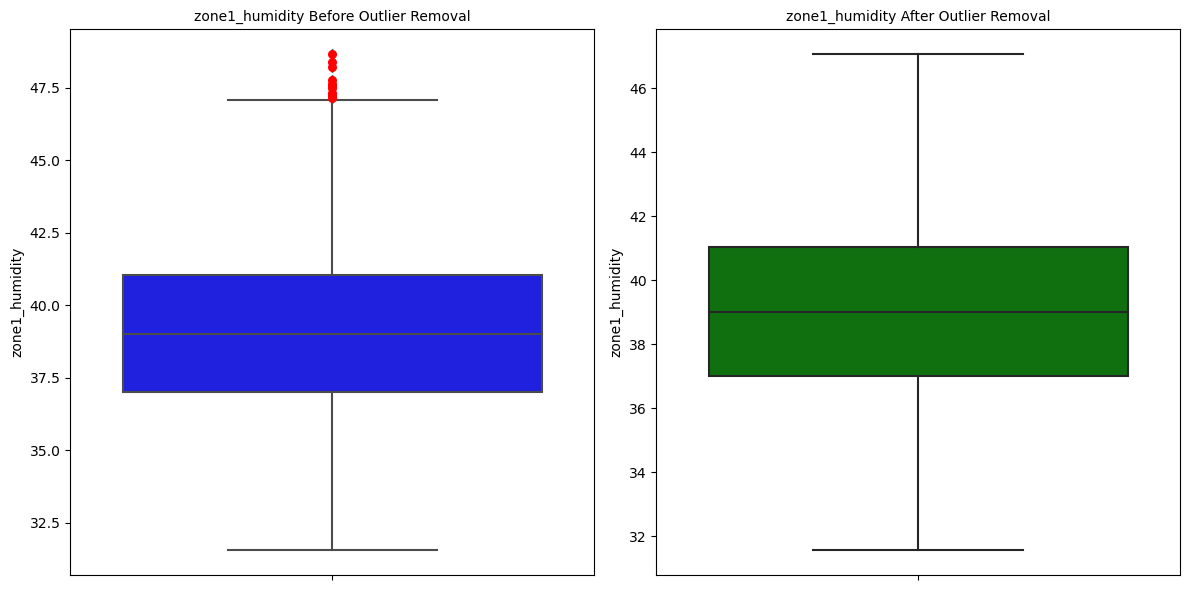

  - Outliers removed from 'zone1_humidity' (11 data points) using IQR.


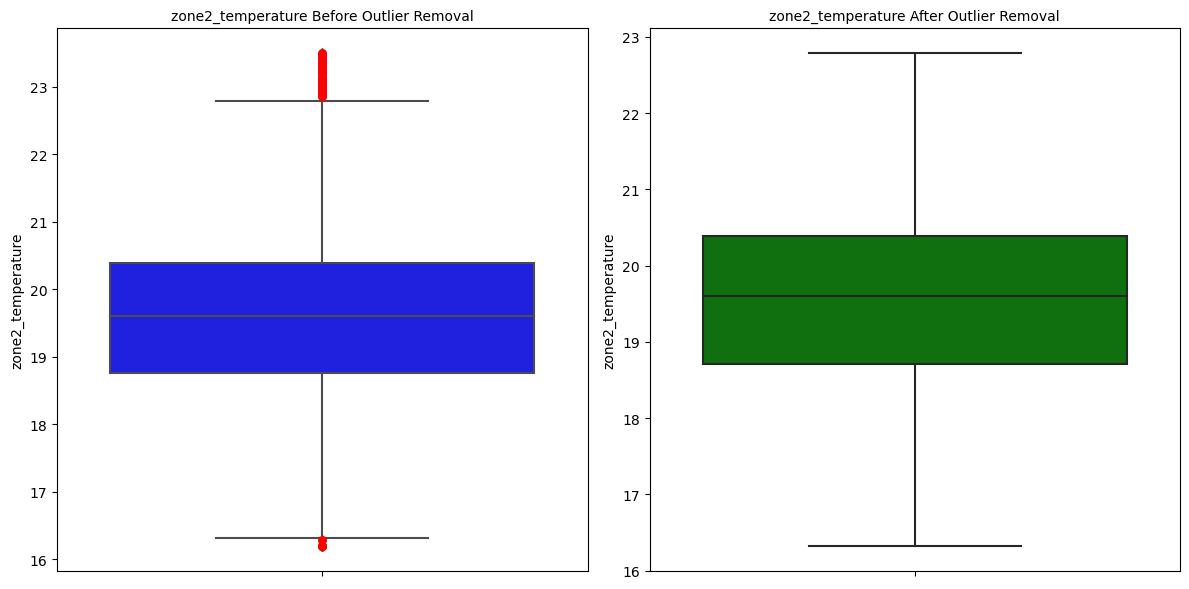

  - Outliers removed from 'zone2_temperature' (56 data points) using IQR.


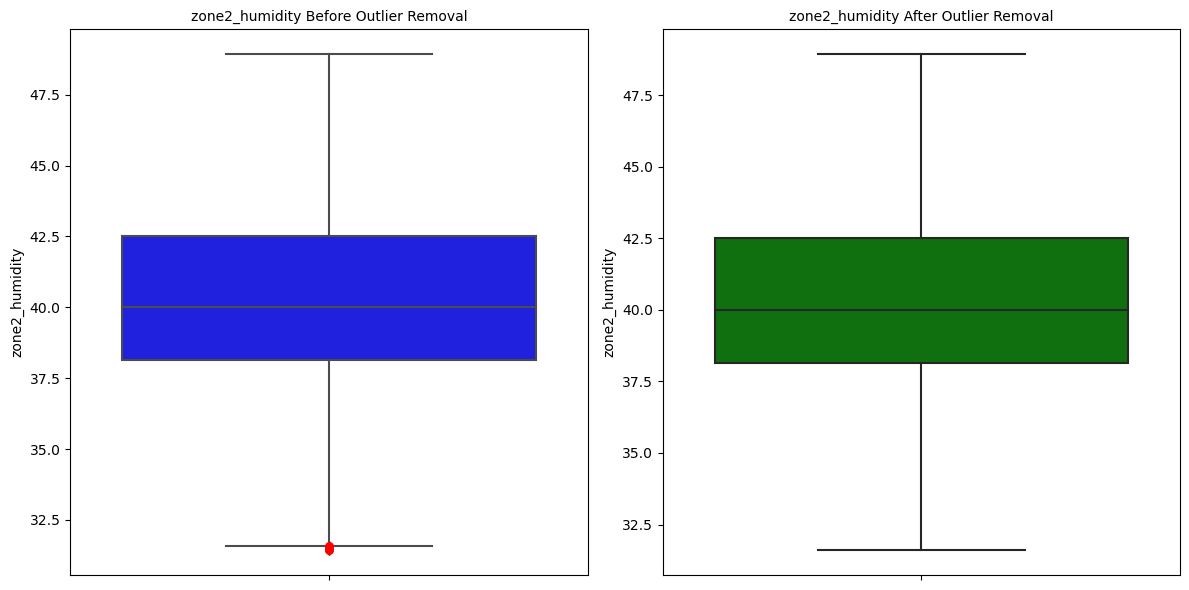

  - Outliers removed from 'zone2_humidity' (3 data points) using IQR.


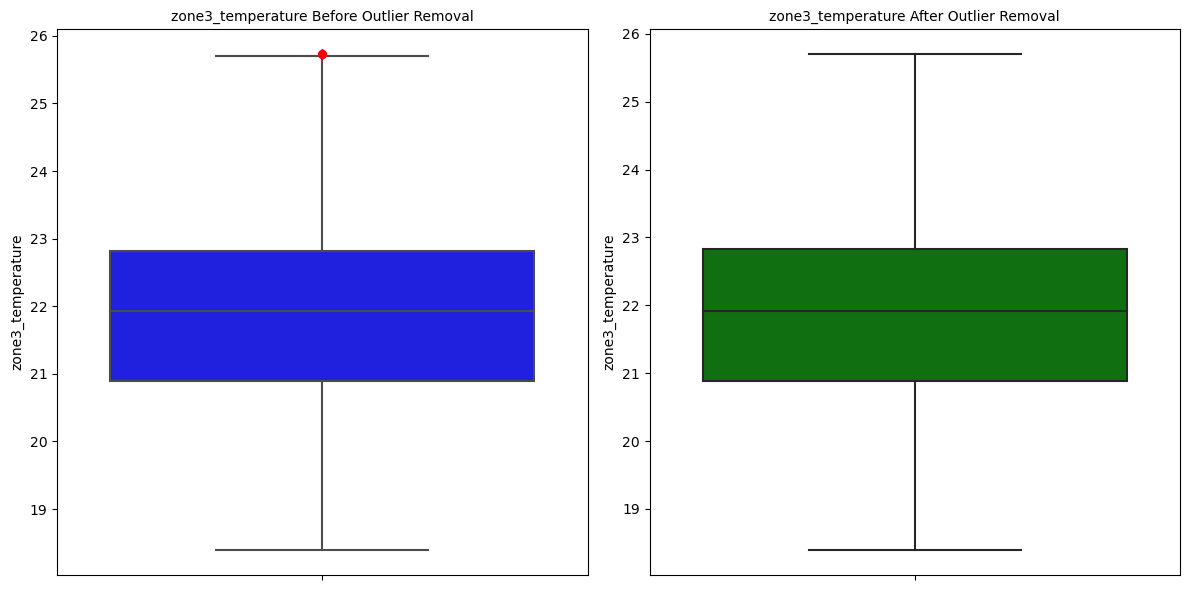

  - Outliers removed from 'zone3_temperature' (2 data points) using IQR.


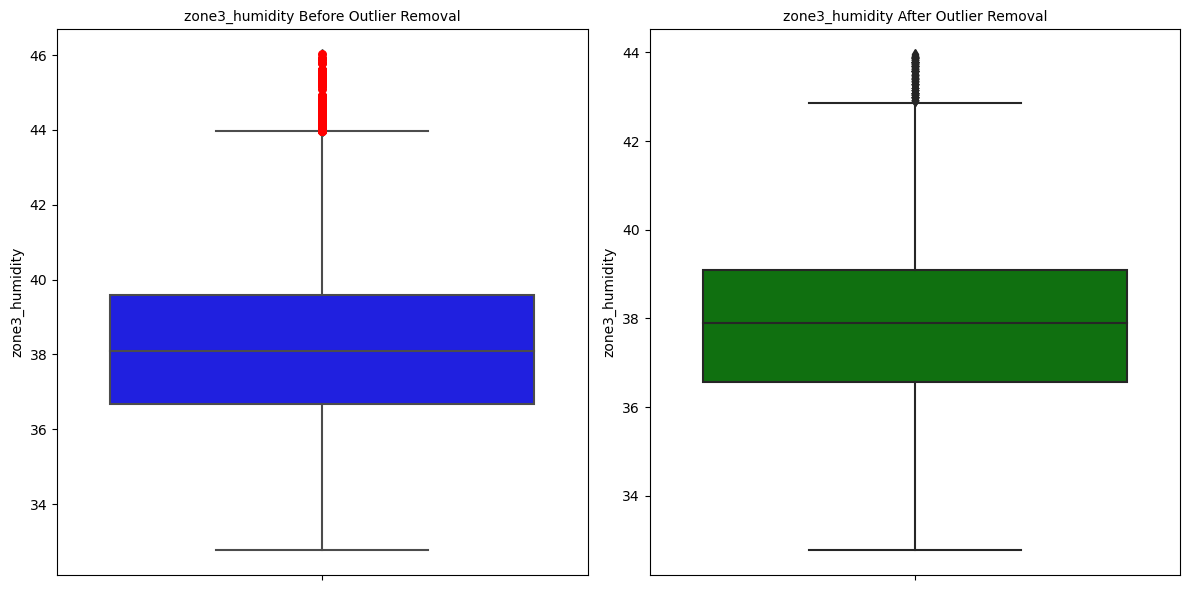

  - Outliers removed from 'zone3_humidity' (264 data points) using IQR.


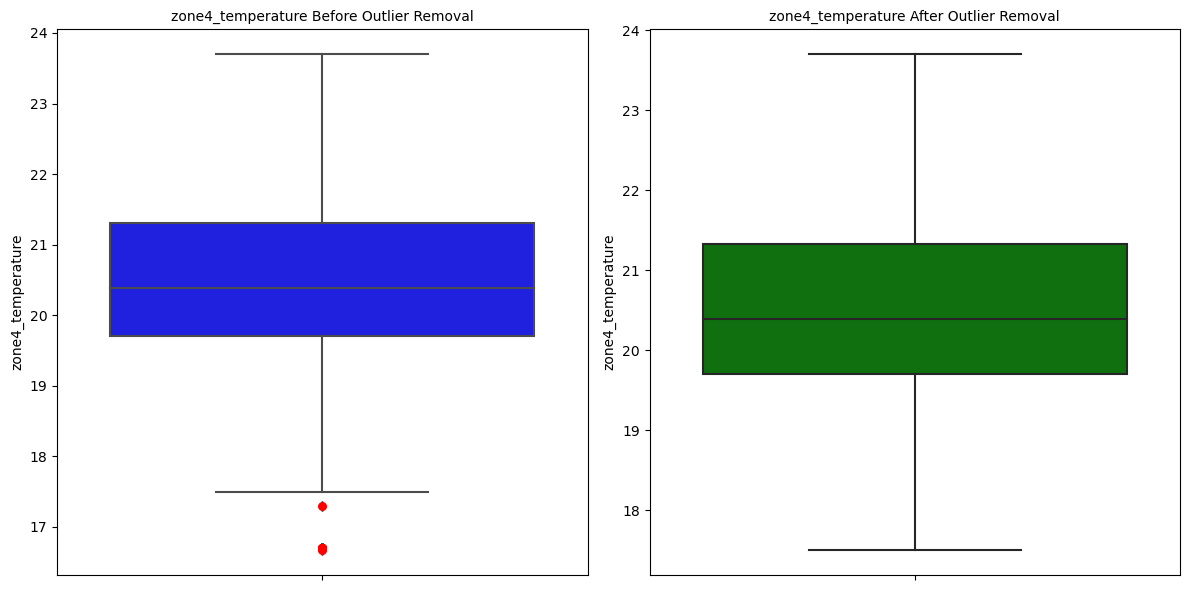

  - Outliers removed from 'zone4_temperature' (12 data points) using IQR.


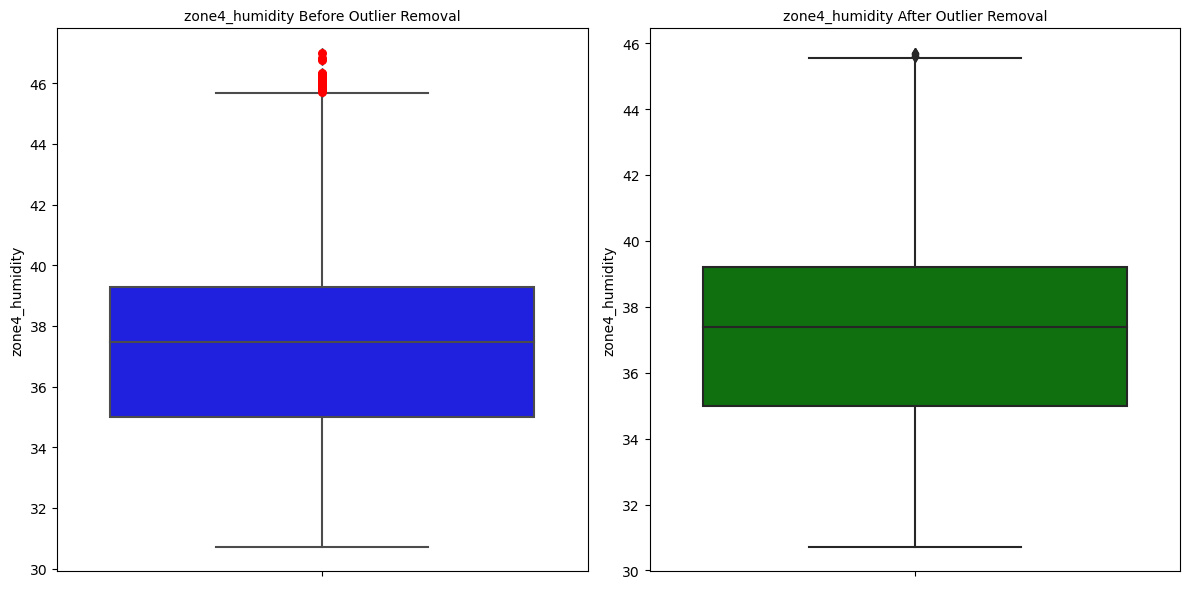

  - Outliers removed from 'zone4_humidity' (27 data points) using IQR.
  - No outliers found in 'zone5_temperature' based on IQR criteria.


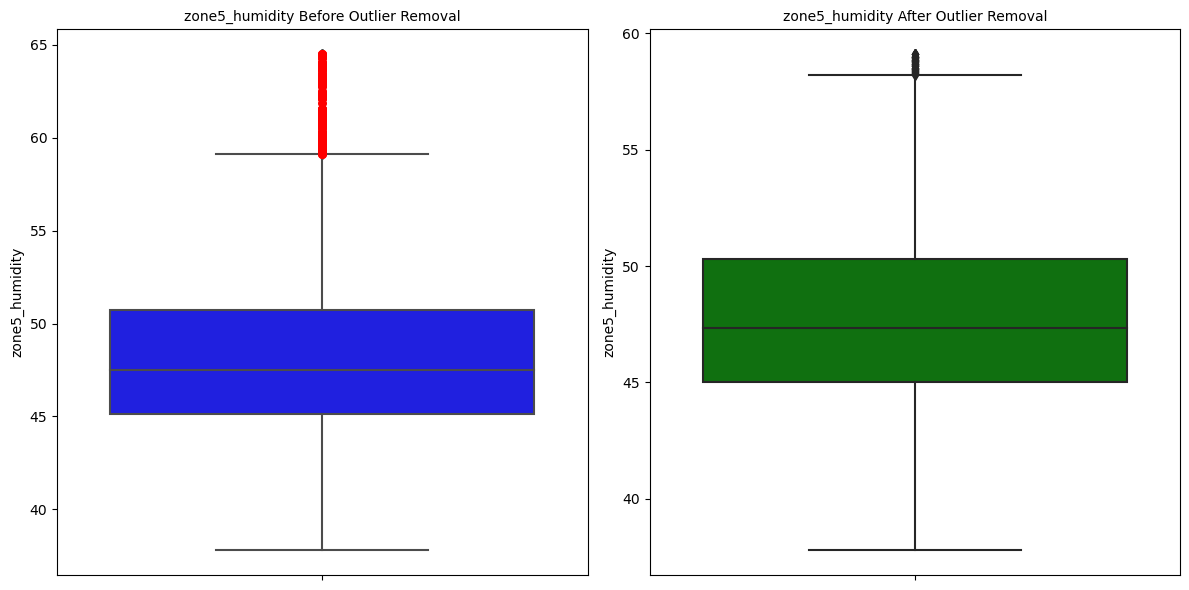

  - Outliers removed from 'zone5_humidity' (116 data points) using IQR.


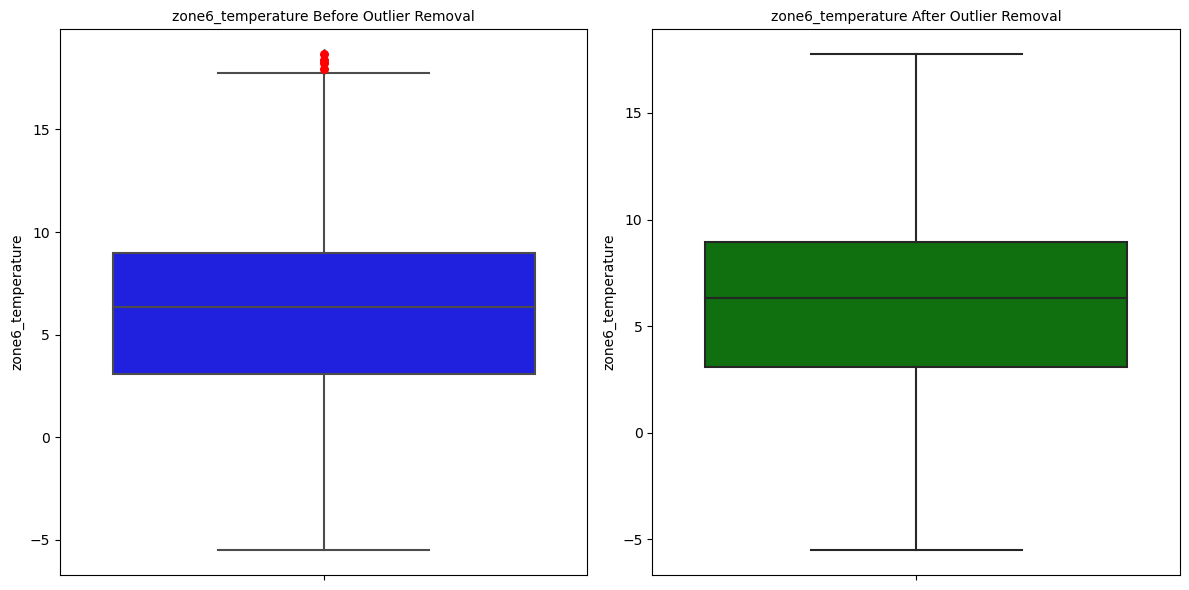

  - Outliers removed from 'zone6_temperature' (4 data points) using IQR.


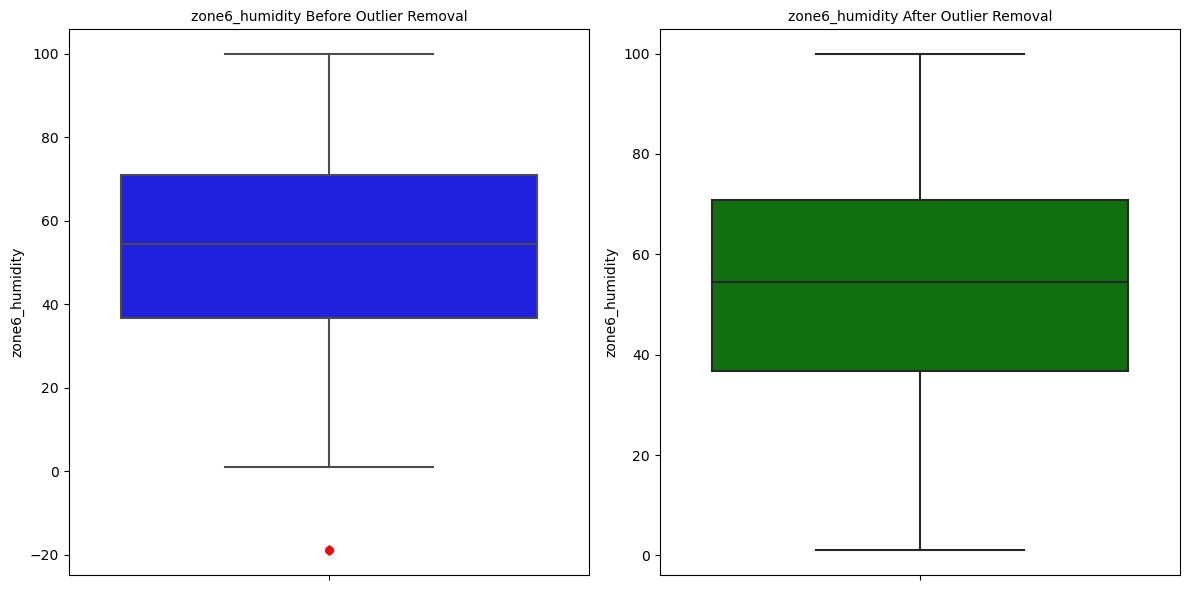

  - Outliers removed from 'zone6_humidity' (1 data points) using IQR.


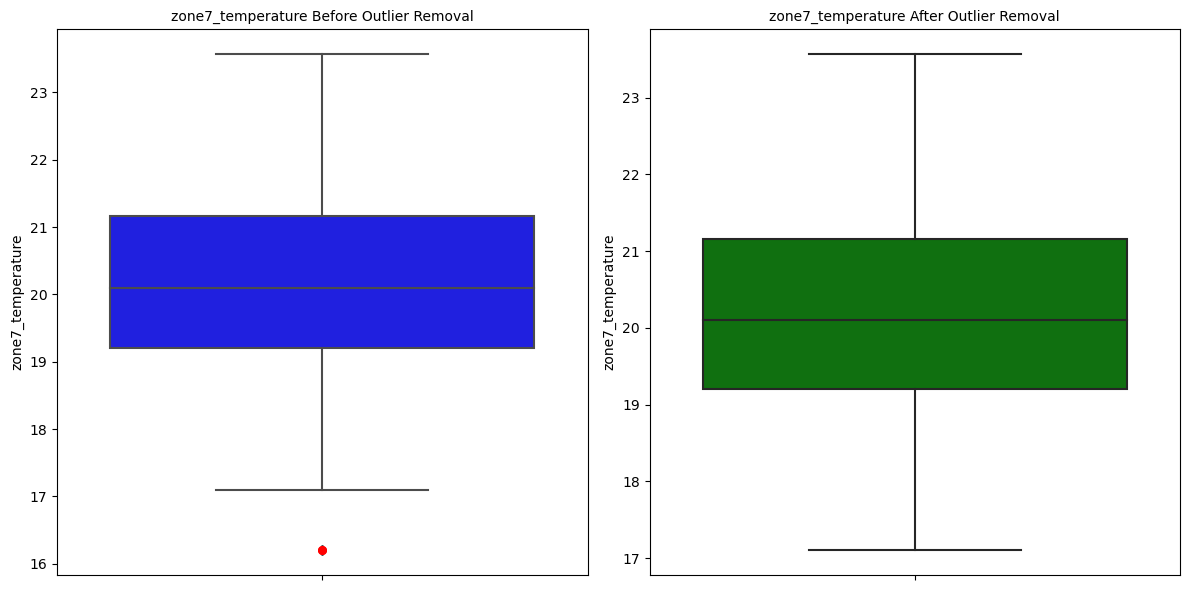

  - Outliers removed from 'zone7_temperature' (2 data points) using IQR.


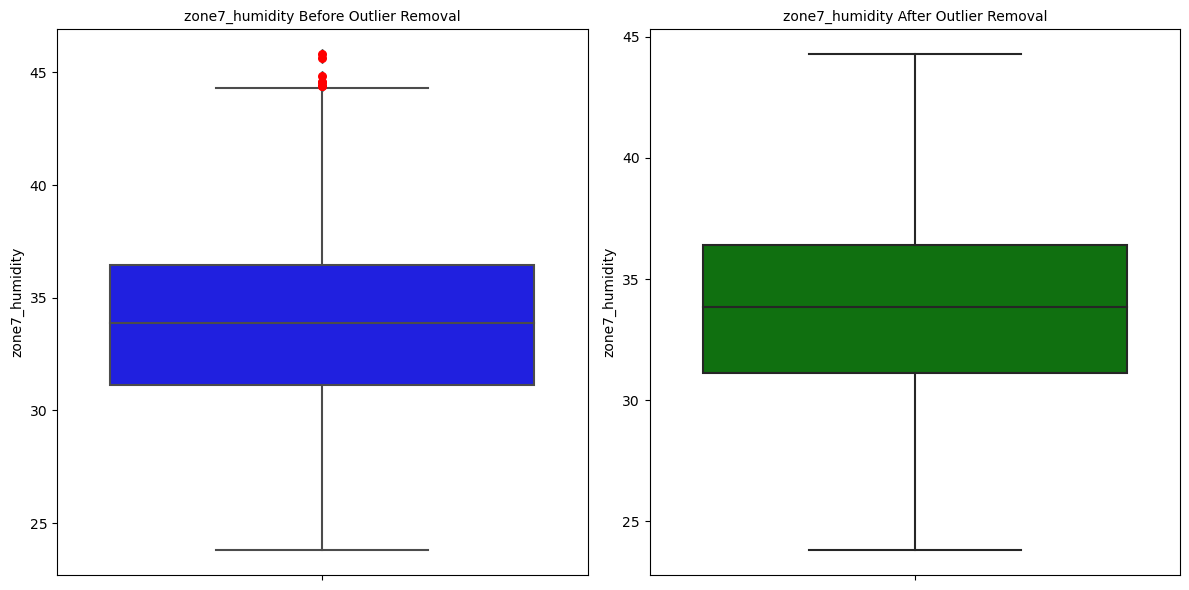

  - Outliers removed from 'zone7_humidity' (7 data points) using IQR.


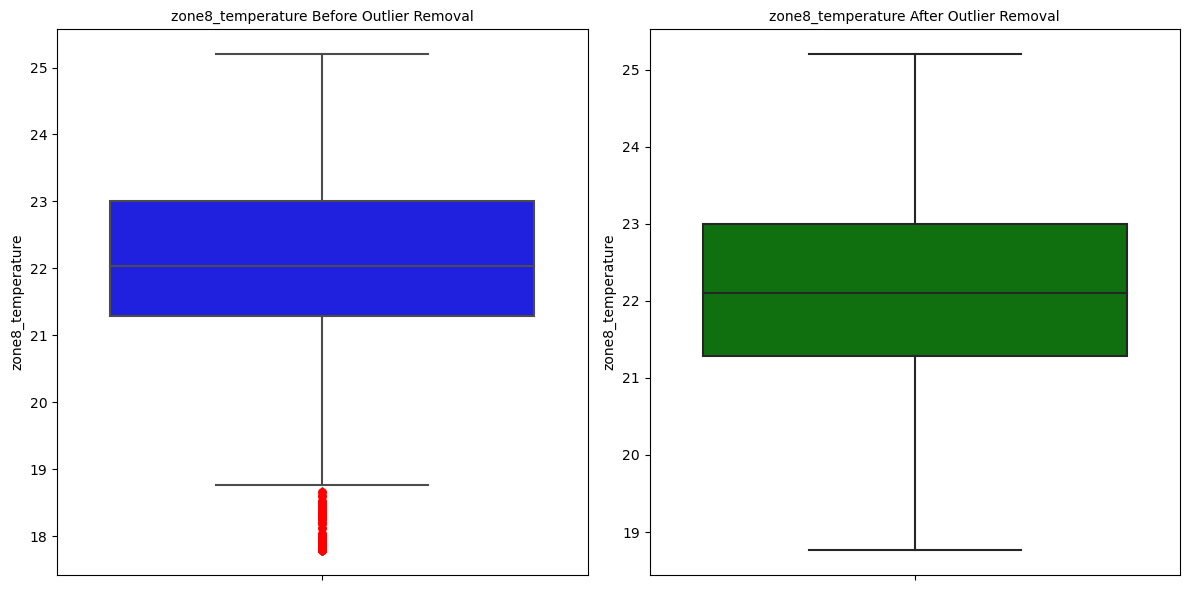

  - Outliers removed from 'zone8_temperature' (43 data points) using IQR.


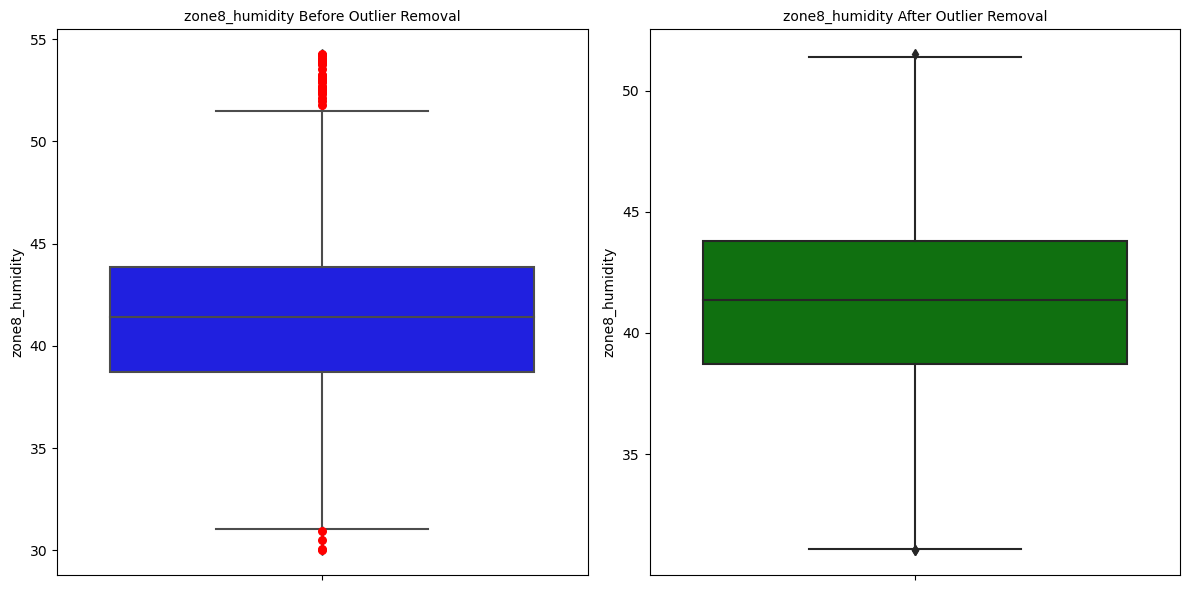

  - Outliers removed from 'zone8_humidity' (31 data points) using IQR.
  - No outliers found in 'zone9_temperature' based on IQR criteria.


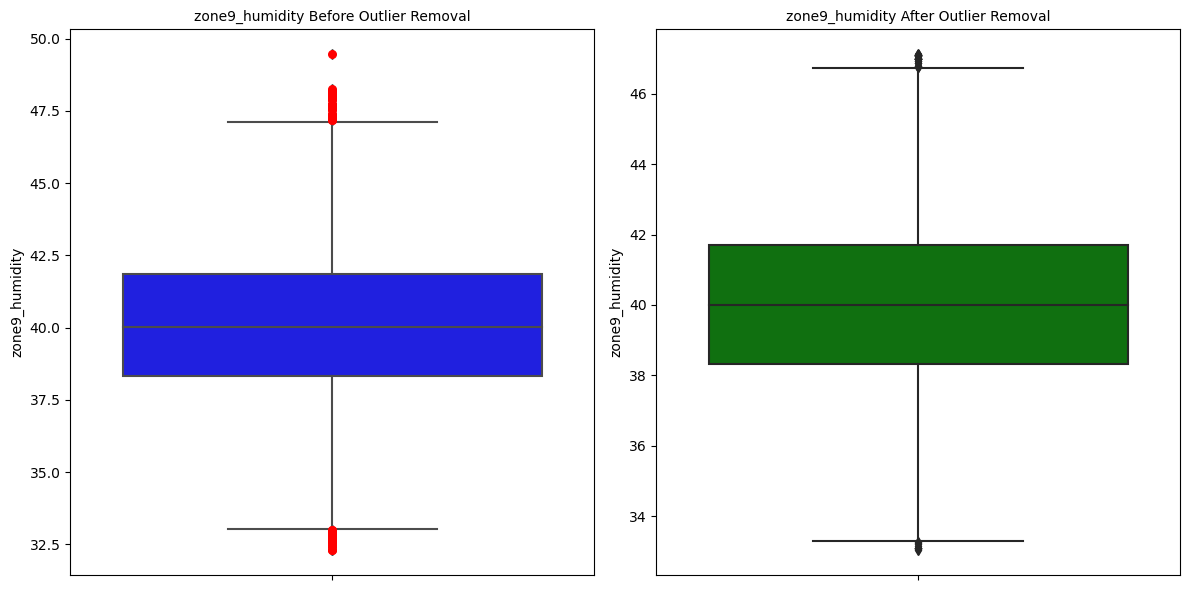

  - Outliers removed from 'zone9_humidity' (75 data points) using IQR.


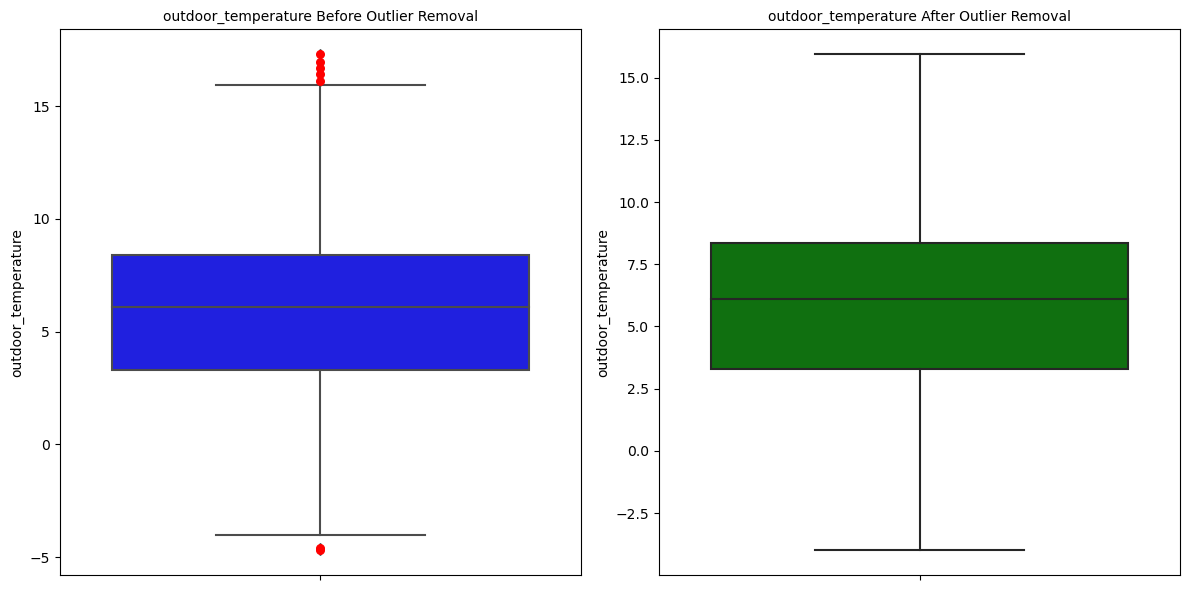

  - Outliers removed from 'outdoor_temperature' (7 data points) using IQR.


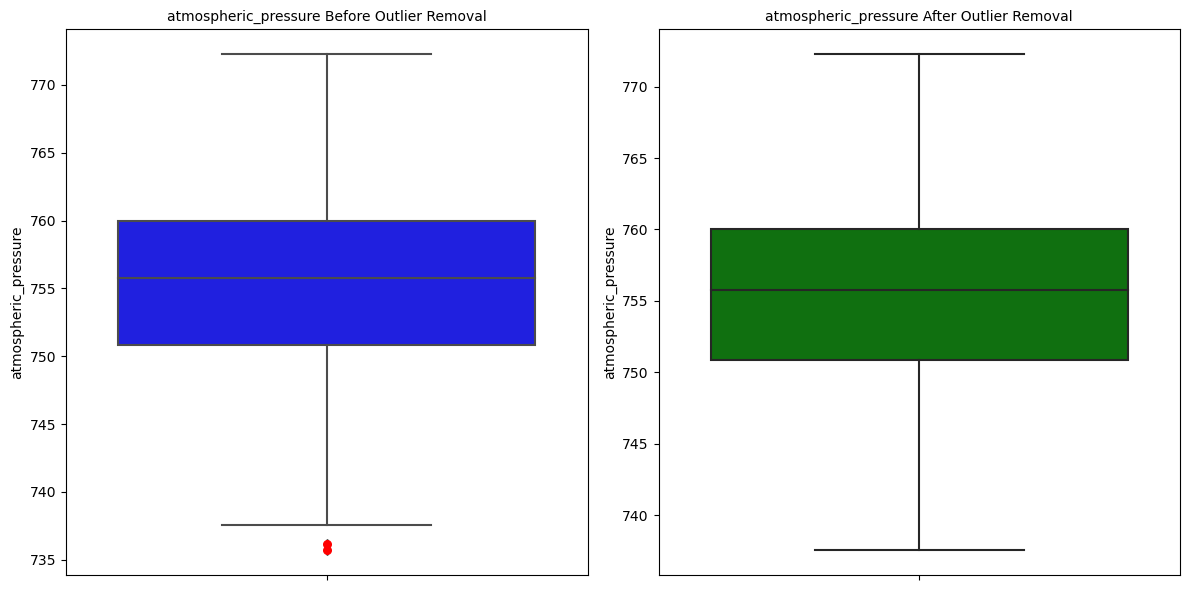

  - Outliers removed from 'atmospheric_pressure' (2 data points) using IQR.
  - No outliers found in 'outdoor_humidity' based on IQR criteria.


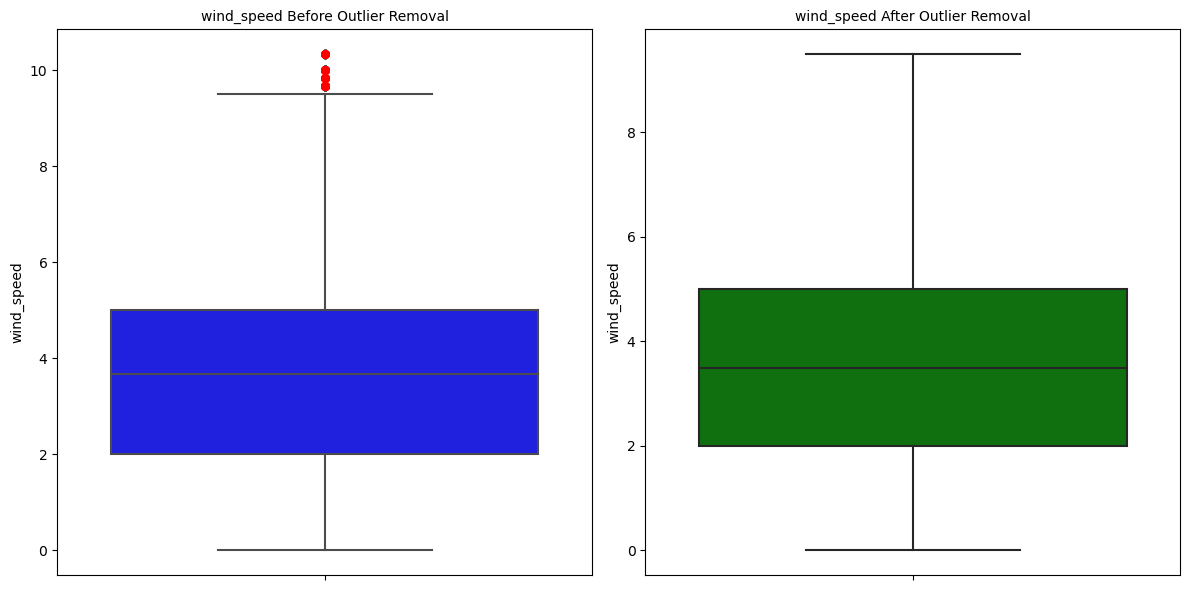

  - Outliers removed from 'wind_speed' (28 data points) using IQR.
  - No outliers found in 'visibility_index' based on IQR criteria.


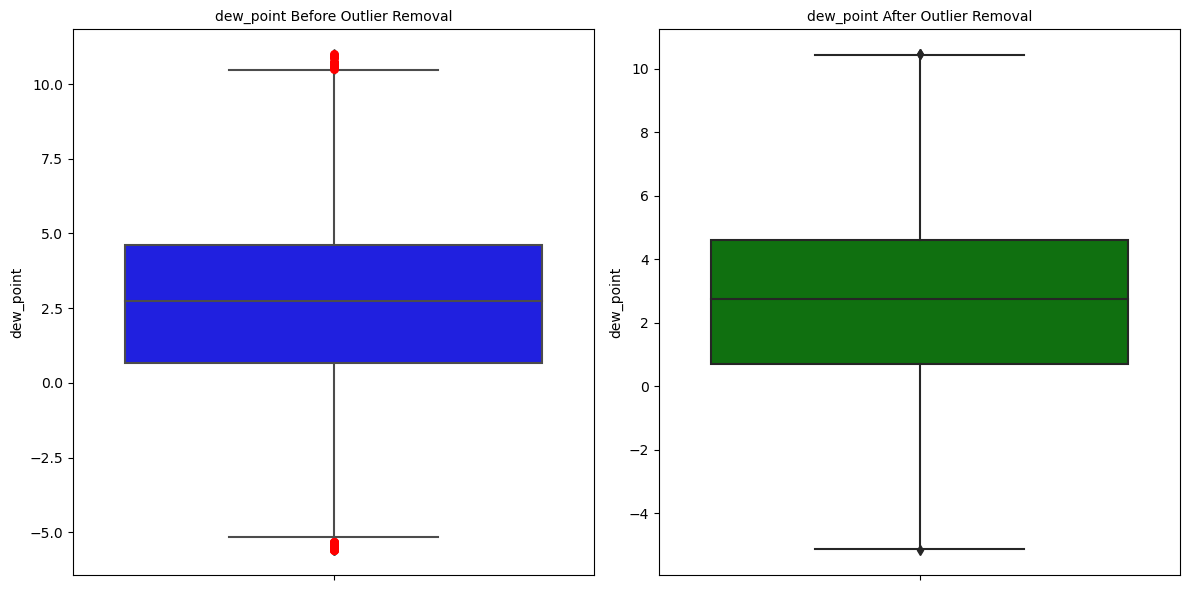

  - Outliers removed from 'dew_point' (36 data points) using IQR.


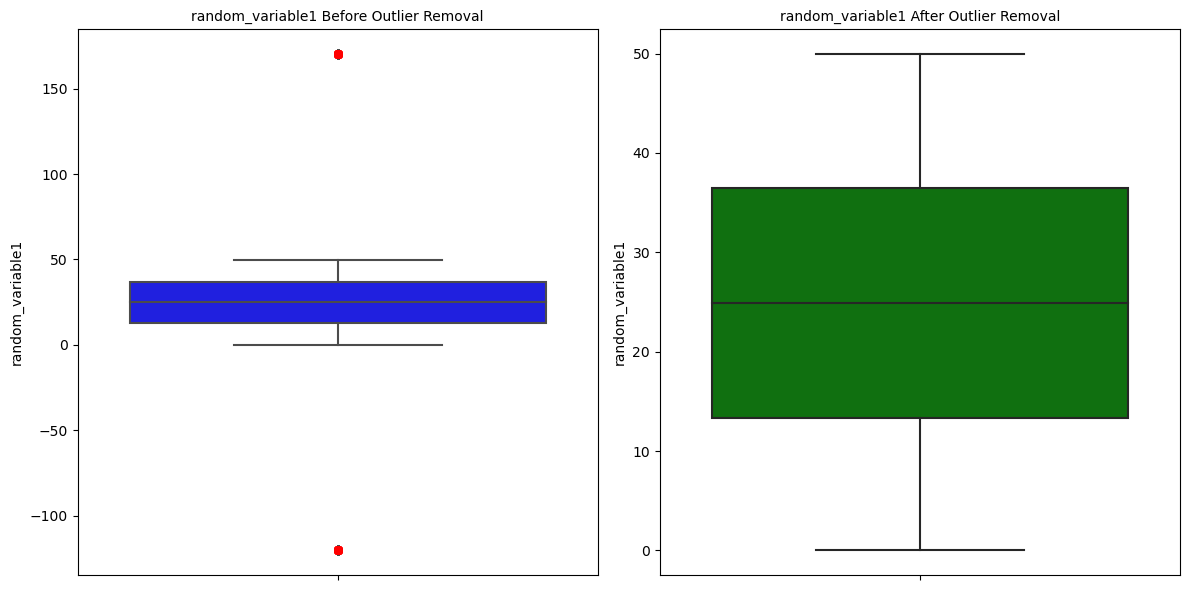

  - Outliers removed from 'random_variable1' (62 data points) using IQR.


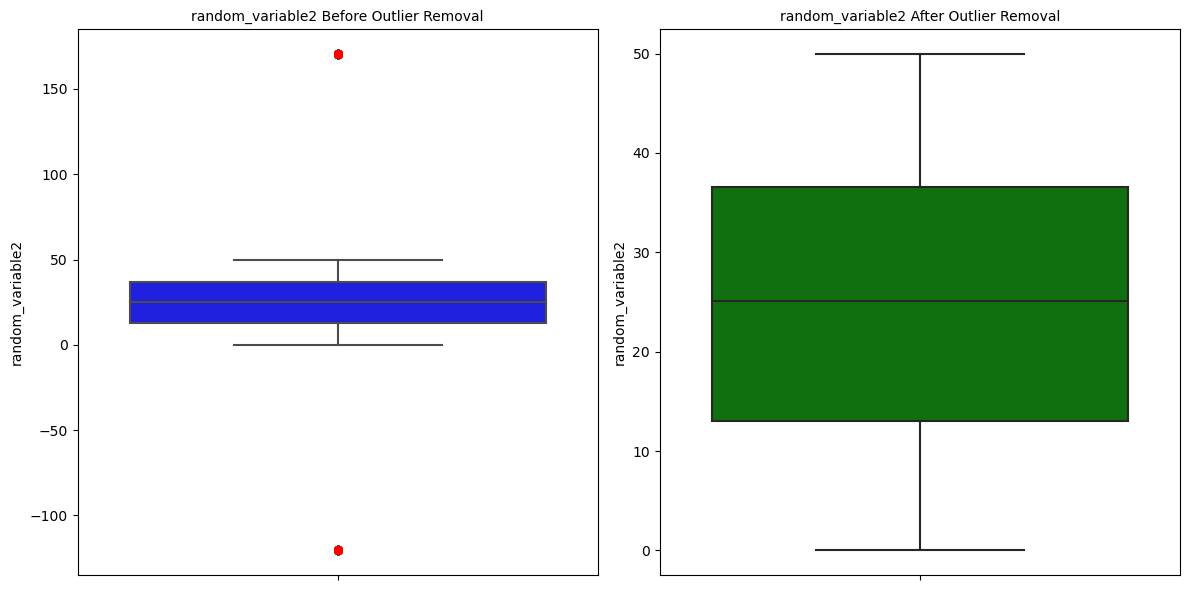

  - Outliers removed from 'random_variable2' (65 data points) using IQR.
  - Total rows before outlier removal: 4222
  - Total rows after outlier removal: 3211
  - Percentage of data removed due to outliers: 23.95%


In [27]:
print("\n3. Outlier Removal using IQR and Plotting:")
cols_to_check_outliers = ['equipment_energy_consumption', 'lighting_energy',
                            'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
                            'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
                            'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
                            'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
                            'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
                            'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
                            'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
                            'wind_speed', 'visibility_index', 'dew_point',
                            'random_variable1', 'random_variable2']
outliers_removed_count = 0
original_row_count = len(df_processed)
for col in cols_to_check_outliers:
    if col not in df_processed.columns or not pd.api.types.is_numeric_dtype(
            df_processed[col]) or df_processed[col].isnull().all():
        continue

    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        print(f"  - IQR is 0 for column '{col}'. Skipping outlier removal for this column.")
        continue

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)
    outliers = df_processed[outliers_mask]
    num_outliers = outliers.shape[0]

    if num_outliers > 0:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_processed[col], color='blue')
        plt.title(f'{col} Before Outlier Removal', fontsize=10)
        plt.scatter(x=np.zeros(len(outliers)), y=outliers[col], color='red', s=30, zorder=3)

        df_processed = df_processed[~outliers_mask] # Remove outliers

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_processed[col], color='green')
        plt.title(f'{col} After Outlier Removal', fontsize=10)
        plt.tight_layout()
        plt.show()
        plt.close()
        print(f"  - Outliers removed from '{col}' ({num_outliers} data points) using IQR.")
        outliers_removed_count += 1
    else:
        print(f"  - No outliers found in '{col}' based on IQR criteria.")

rows_after_outlier_removal = len(df_processed)
removed_percentage = ((original_row_count - rows_after_outlier_removal) / original_row_count) * 100 if original_row_count > 0 else 0
print(f"  - Total rows before outlier removal: {original_row_count}")
print(f"  - Total rows after outlier removal: {rows_after_outlier_removal}")
print(f"  - Percentage of data removed due to outliers: {removed_percentage:.2f}%")

if outliers_removed_count == 0:
    print("  - No outliers found or removed based on IQR criteria in checked columns.")



4. Data Binning for Temperature:


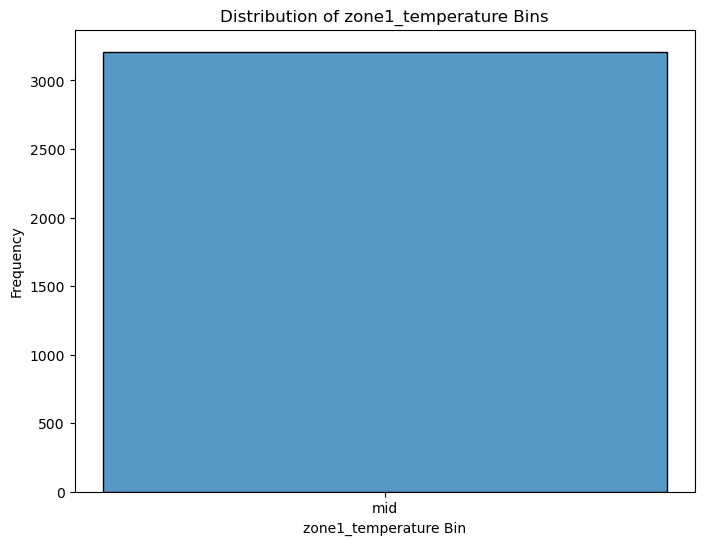

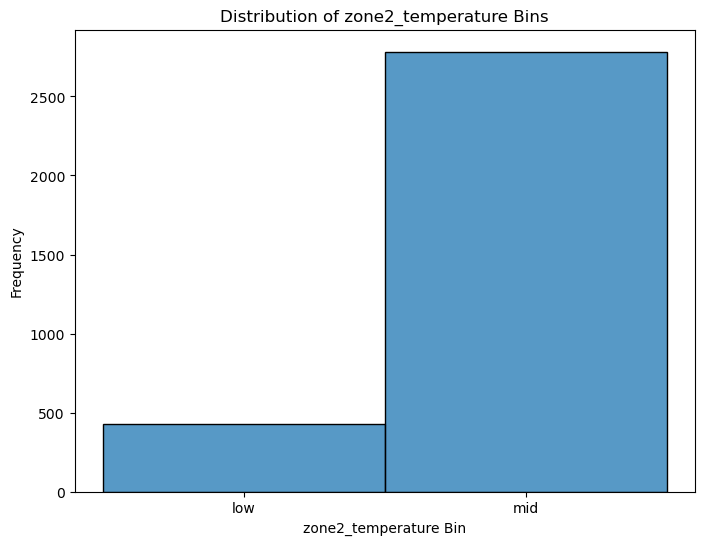

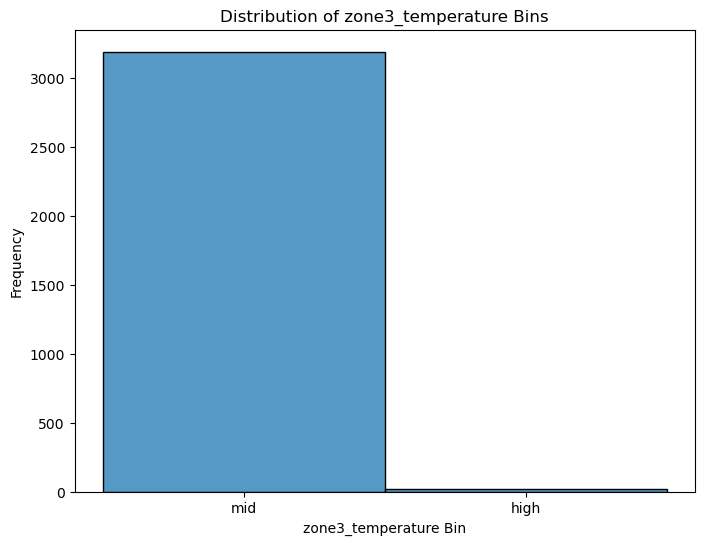

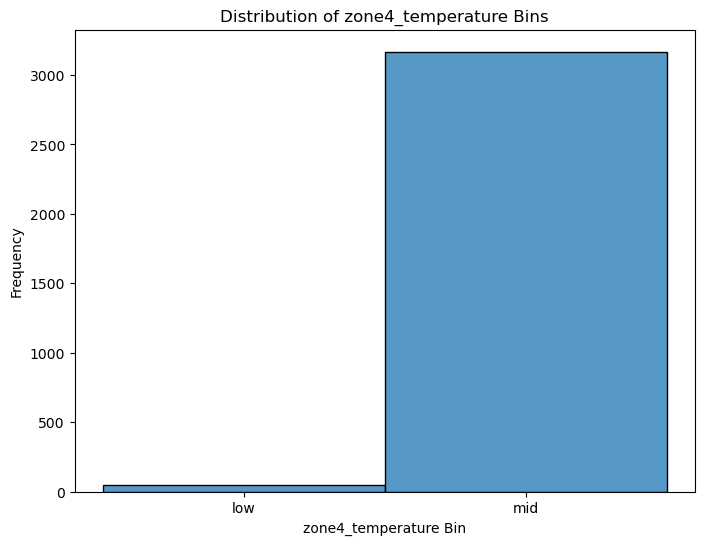

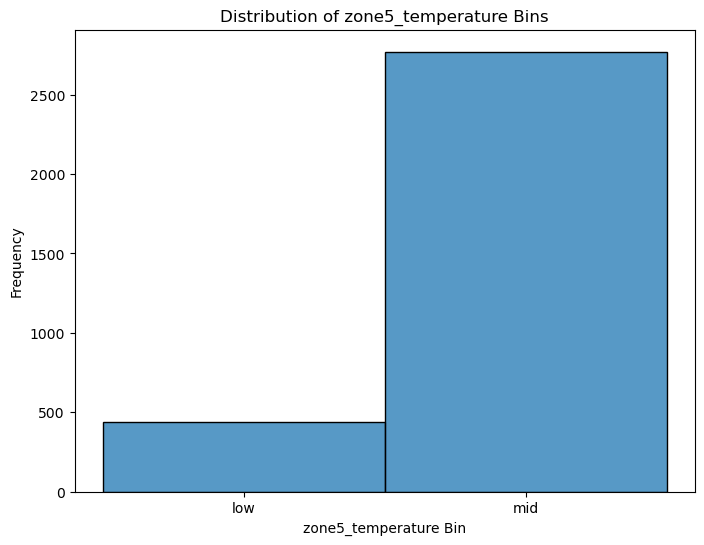

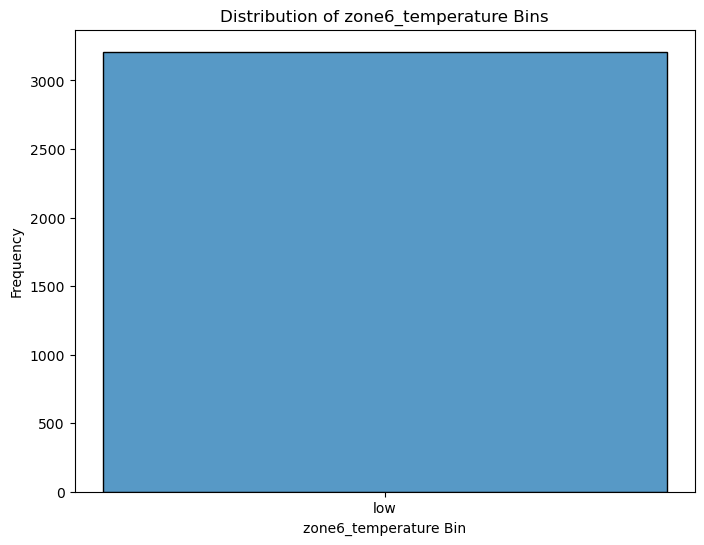

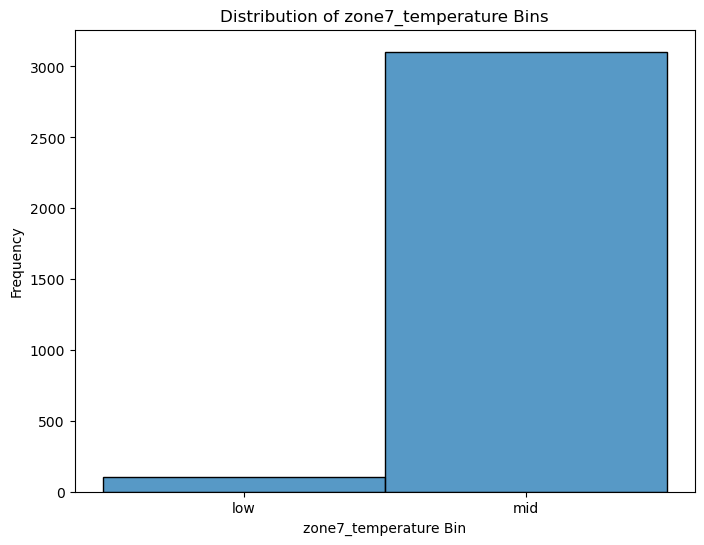

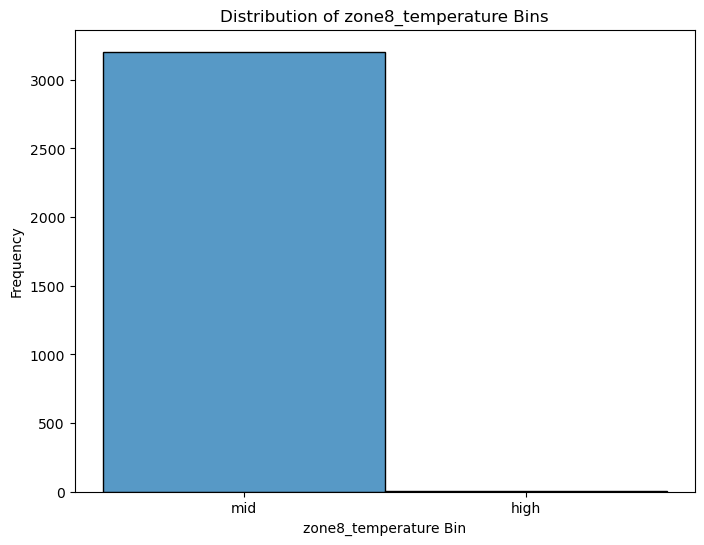

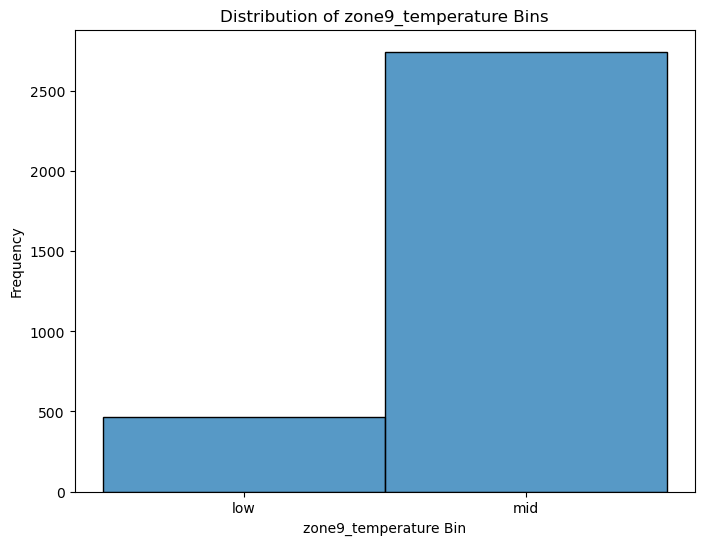

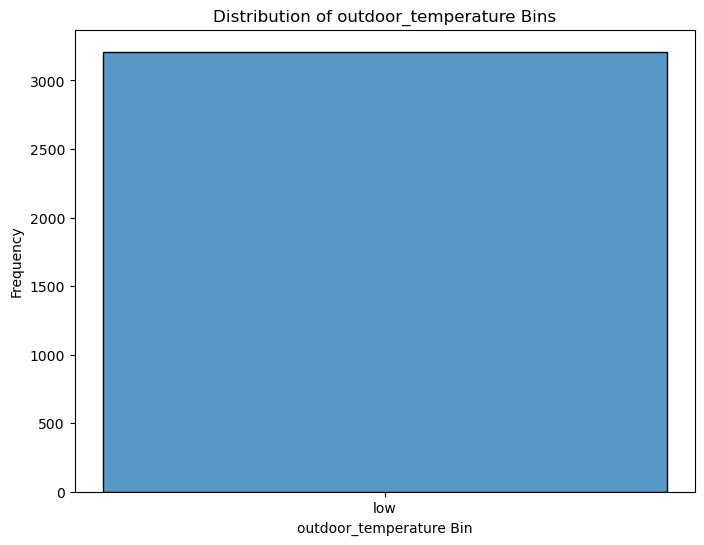

  - 10 temperature columns binned into categories: 'low, mid, high' using overall range [-5.5-25.7] and thresholds 18, 25. Binning can help capture non-linear relationships and simplify the model, but choice of bins should be informed by domain knowledge.
Temperature Binning Done!


In [34]:
print("\n4. Data Binning for Temperature:")
temp_cols_to_bin = [f'zone{i}_temperature' for i in range(1, 10)] + ['outdoor_temperature']
available_temp_cols = [col for col in df_processed.columns if
                        col in temp_cols_to_bin and pd.api.types.is_numeric_dtype(
                            df_processed[col]) and not df_processed[col].isnull().all()]

if available_temp_cols:
    all_temps = pd.concat([df_processed[col] for col in available_temp_cols]).dropna()
    if not all_temps.empty:
        min_temp, max_temp = all_temps.min(), all_temps.max()
        bins = sorted(list(set([min_temp, 18, 25, max_temp])))
        if len(bins) < 2 or bins[0] == bins[-1]:
            print(
                f"  - Temperature range [{min_temp:.1f}-{max_temp:.1f}] not suitable for distinct "
                "binning with 18, 25. Skipping."
            )
        else:
            labels = ['low', 'mid', 'high'][:len(bins) - 1] if len(bins) > 2 else [
                'range1'] if len(bins) == 2 else []
            if not labels:
                labels = ['default_cat']

            binned_temp_cols_count = 0
            for col in available_temp_cols:
                df_processed[col + '_bin'] = pd.cut(df_processed[col], bins=bins,
                                                    labels=labels, include_lowest=True,
                                                    duplicates='drop')
                binned_temp_cols_count += 1
                if col + '_bin' in df_processed.columns:
                    plt.figure(figsize=(8, 6))
                    sns.histplot(df_processed[col + '_bin'], discrete=True, stat='count')
                    plt.title(f'Distribution of {col} Bins')
                    plt.xlabel(f'{col} Bin')
                    plt.ylabel('Frequency')
                    plt.show()  # Display the plot on the screen
                    plt.close() # Close the plot to free up resources
            print(
                f"  - {binned_temp_cols_count} temperature columns binned into categories: "
                f"'{', '.join(labels)}' using overall range [{min_temp:.1f}-{max_temp:.1f}] and "
                "thresholds 18, 25. Binning can help capture non-linear relationships and simplify "
                "the model, but choice of bins should be informed by domain knowledge."
            )
    else:
        print("  - No valid temperature data for defining overall min/max for binning.")
else:
    print("  - No suitable temperature columns found for binning.")

print("Temperature Binning Done!")

### <span style="color:#003366; font-size:32px;">3.EDA</span>


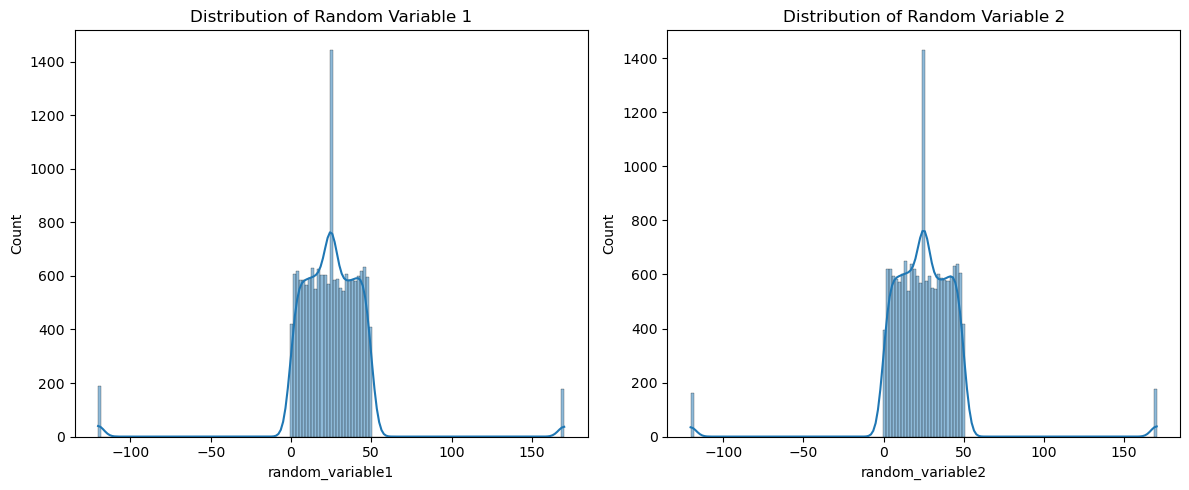


Summary statistics of random variables:
       random_variable1  random_variable2
count      16857.000000      16857.000000
mean          24.854981         25.093780
std           25.564582         24.891957
min         -120.170177       -120.409590
25%           12.808011         12.805830
50%           24.854981         25.093780
75%           37.242702         37.277176
max          170.156325        170.329617

Correlation of random_variable1 with target: -0.015
Correlation of random_variable2 with target: -0.011


In [35]:

# ### 3.1. Analyzing Random Variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['random_variable1'], kde=True)
plt.title('Distribution of Random Variable 1')

plt.subplot(1, 2, 2)
sns.histplot(df['random_variable2'], kde=True)
plt.title('Distribution of Random Variable 2')

plt.tight_layout()
plt.show()

print("\nSummary statistics of random variables:")
print(df[['random_variable1', 'random_variable2']].describe())

# Check correlation with the target variable
correlation_rv1_target = df['random_variable1'].corr(df['equipment_energy_consumption'])
correlation_rv2_target = df['random_variable2'].corr(df['equipment_energy_consumption'])
print(f"\nCorrelation of random_variable1 with target: {correlation_rv1_target:.3f}")
print(f"Correlation of random_variable2 with target: {correlation_rv2_target:.3f}")

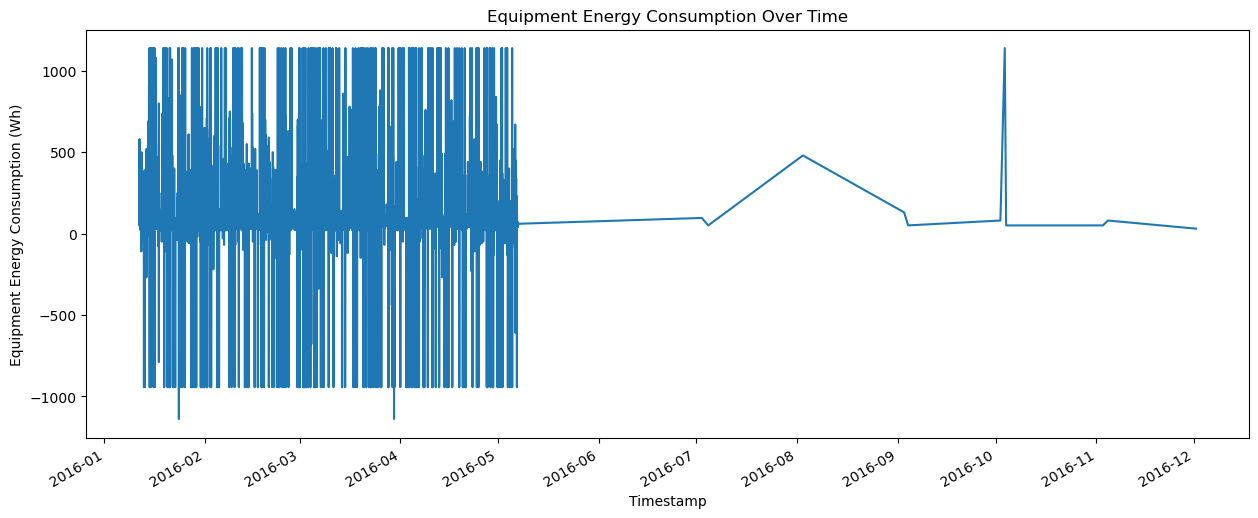

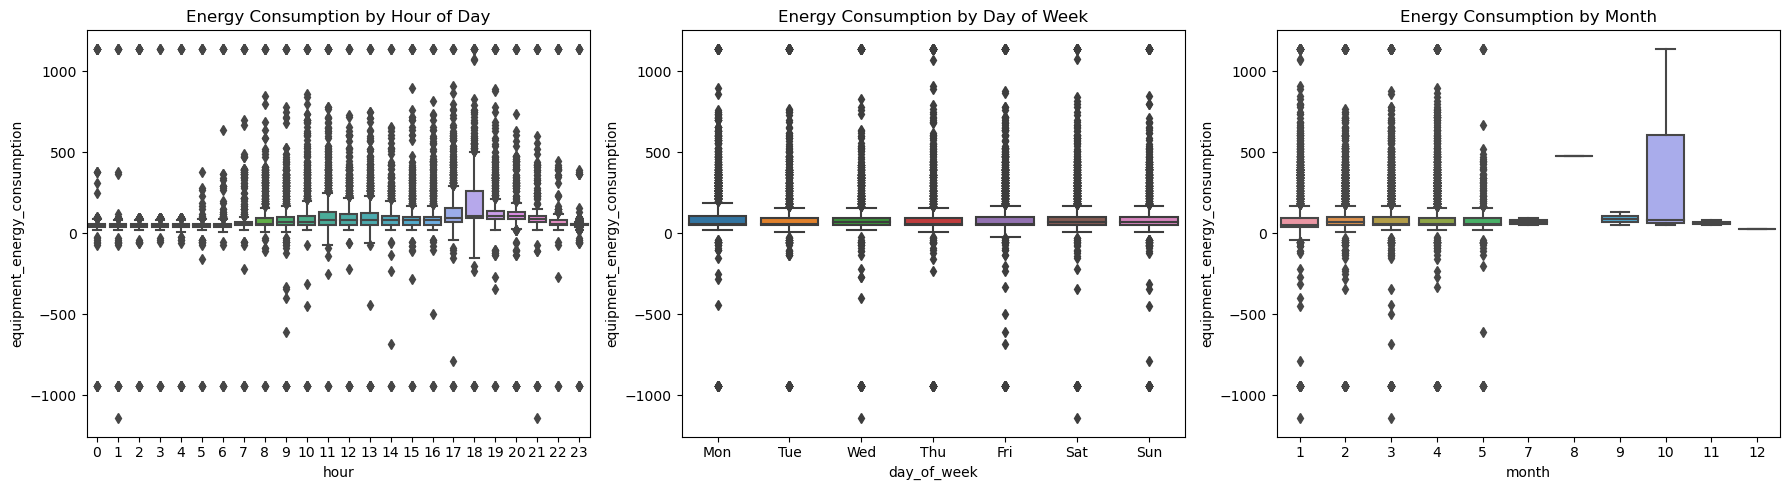

In [24]:
# ### 3.2. Analyzing Time Series Component
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

plt.figure(figsize=(15, 6))
df['equipment_energy_consumption'].plot()
plt.title('Equipment Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Equipment Energy Consumption (Wh)')
plt.show()

# Extracting temporal features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Boxplots of energy consumption by hour, day of week, and month
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title('Energy Consumption by Hour of Day')

plt.subplot(1, 3, 2)
sns.boxplot(x='day_of_week', y='equipment_energy_consumption', data=df)
plt.title('Energy Consumption by Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.subplot(1, 3, 3)
sns.boxplot(x='month', y='equipment_energy_consumption', data=df)
plt.title('Energy Consumption by Month')

plt.tight_layout()
plt.show()

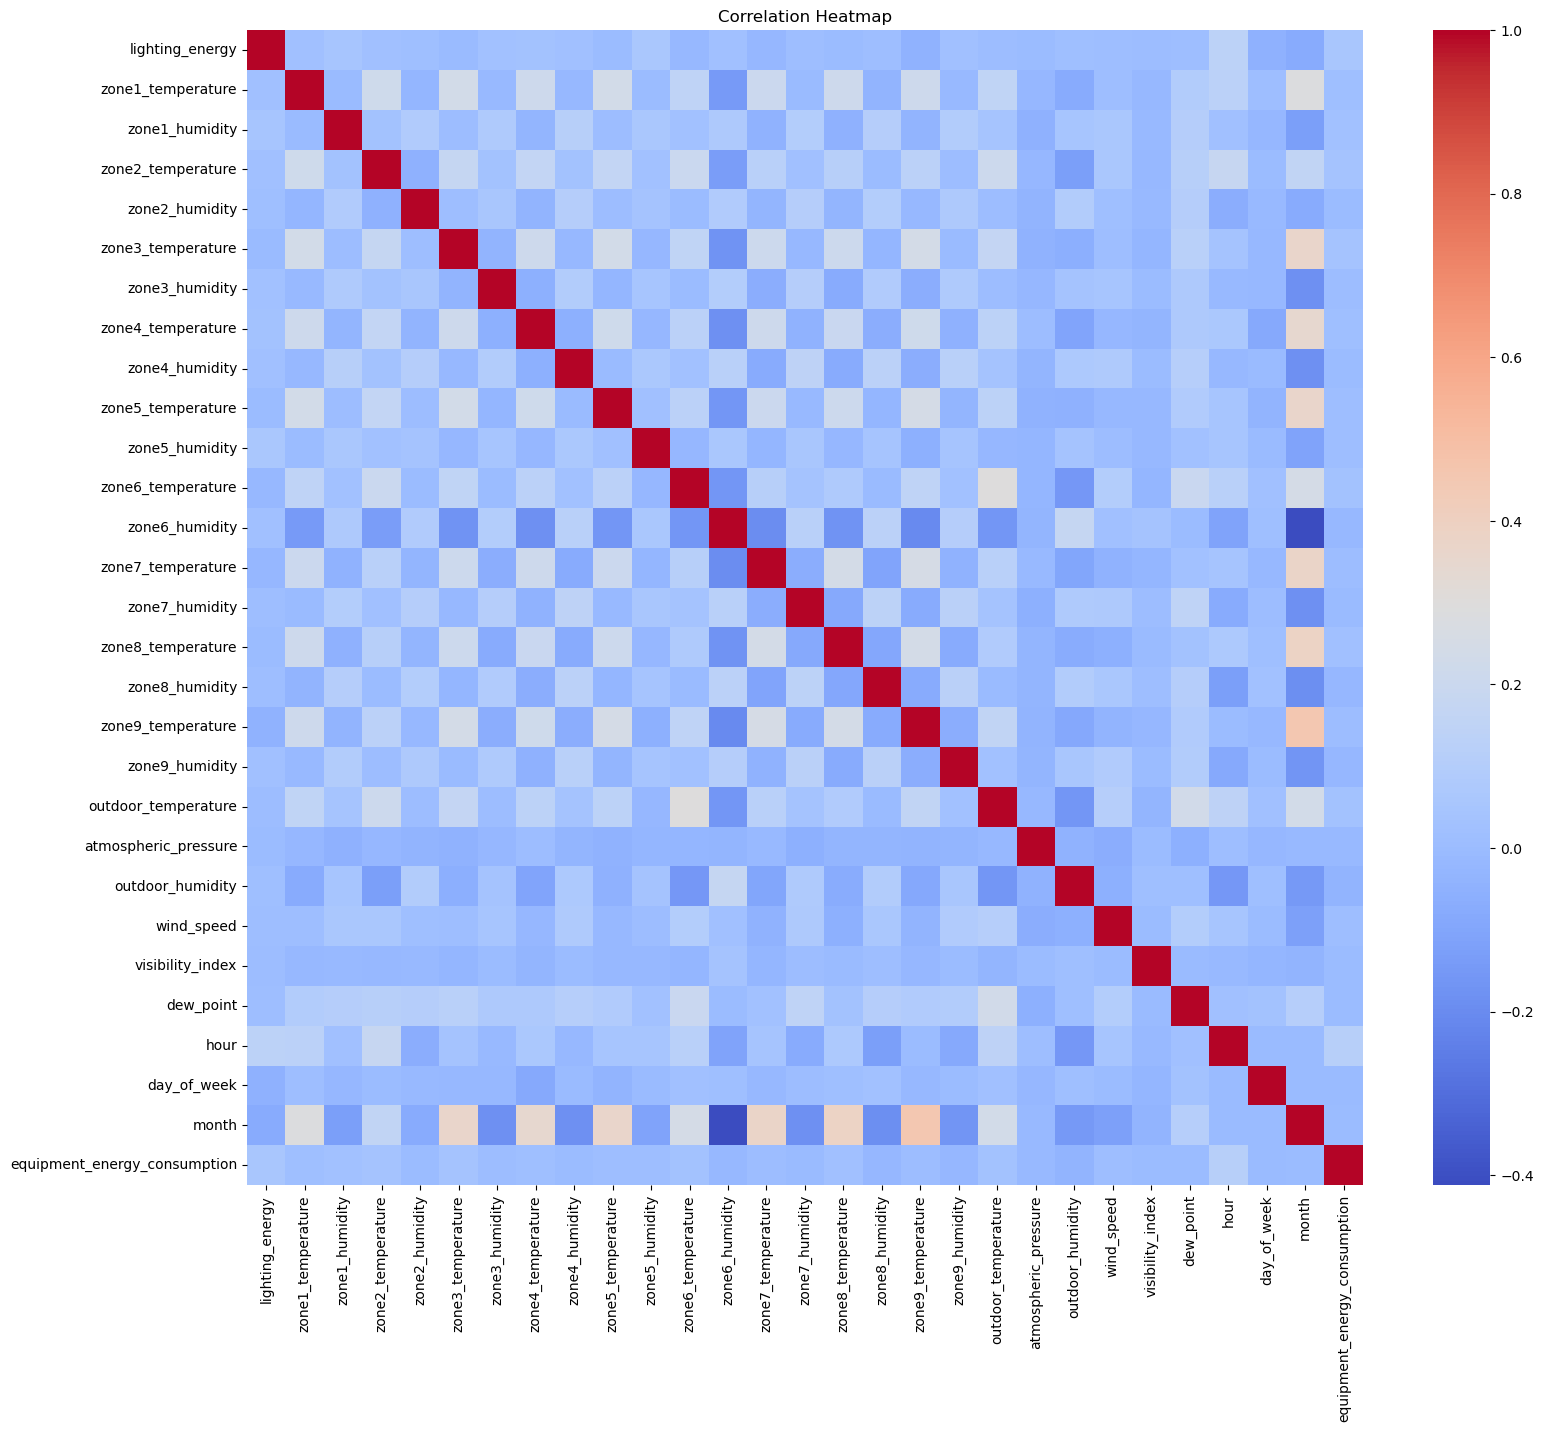

In [36]:
# ### 3.3. Analyzing Relationships Between Features and Target
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('equipment_energy_consumption')
numerical_features.remove('random_variable1')
numerical_features.remove('random_variable2')

# Correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(df[numerical_features + ['equipment_energy_consumption']].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

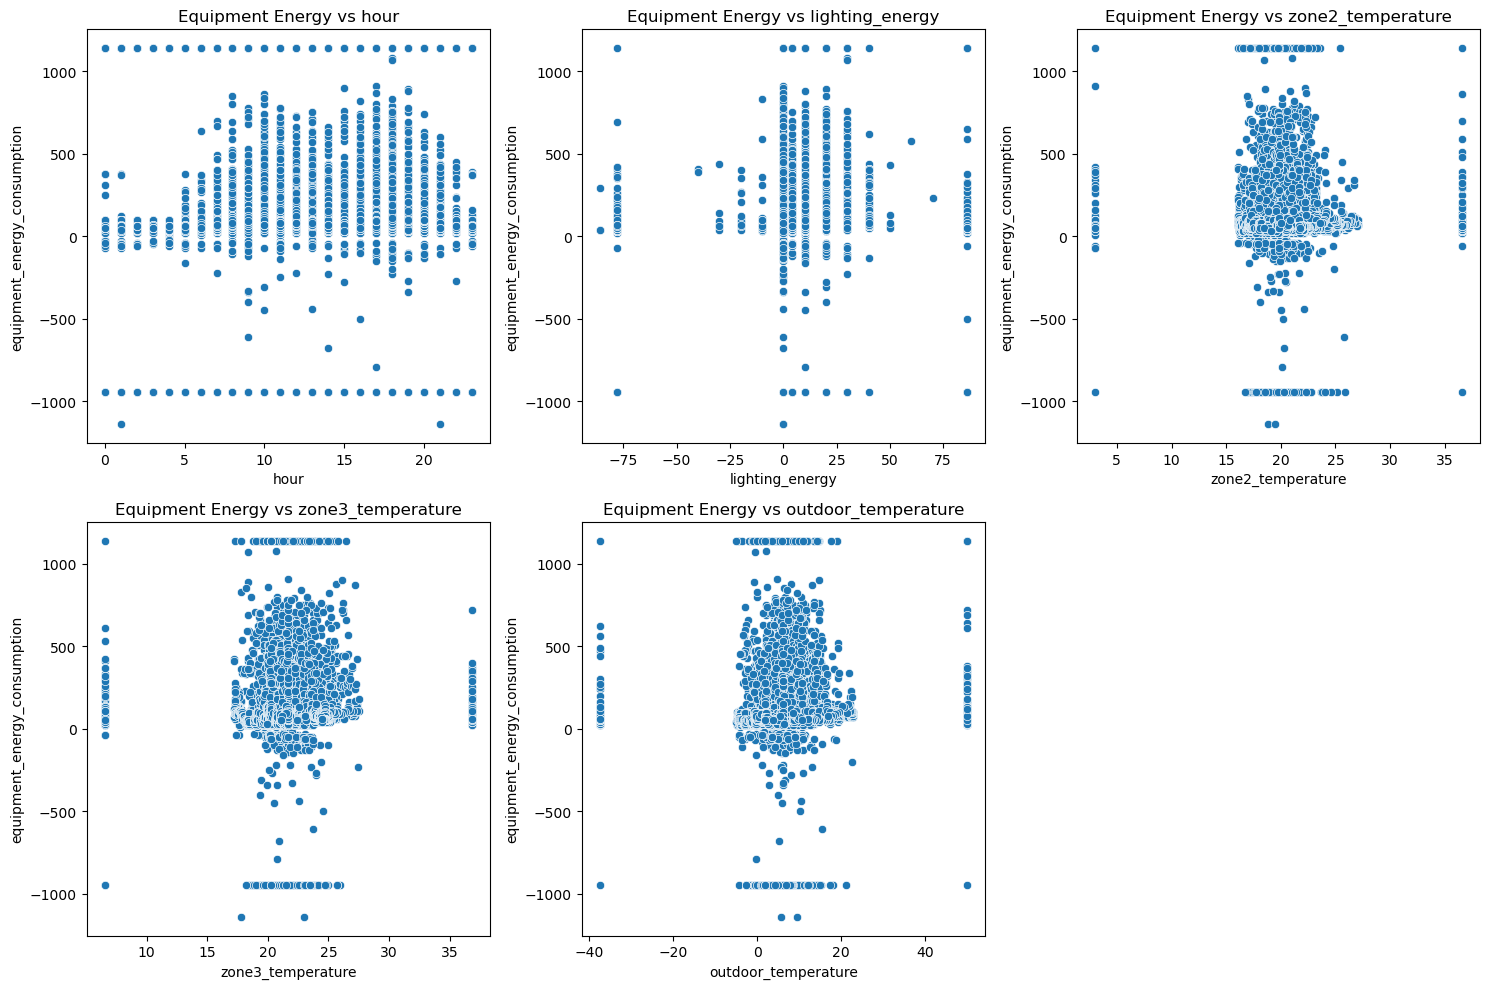

In [26]:
# Scatter plots of top correlated features with the target
top_n = 5
correlations = df[numerical_features + ['equipment_energy_consumption']].corr()['equipment_energy_consumption'].sort_values(ascending=False)
top_correlated_features = correlations[1:top_n+1].index.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_correlated_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['equipment_energy_consumption'])
    plt.title(f'Equipment Energy vs {feature}')
plt.tight_layout()
plt.show()


Starting Scatter Plots of Top Correlated Features with Target...


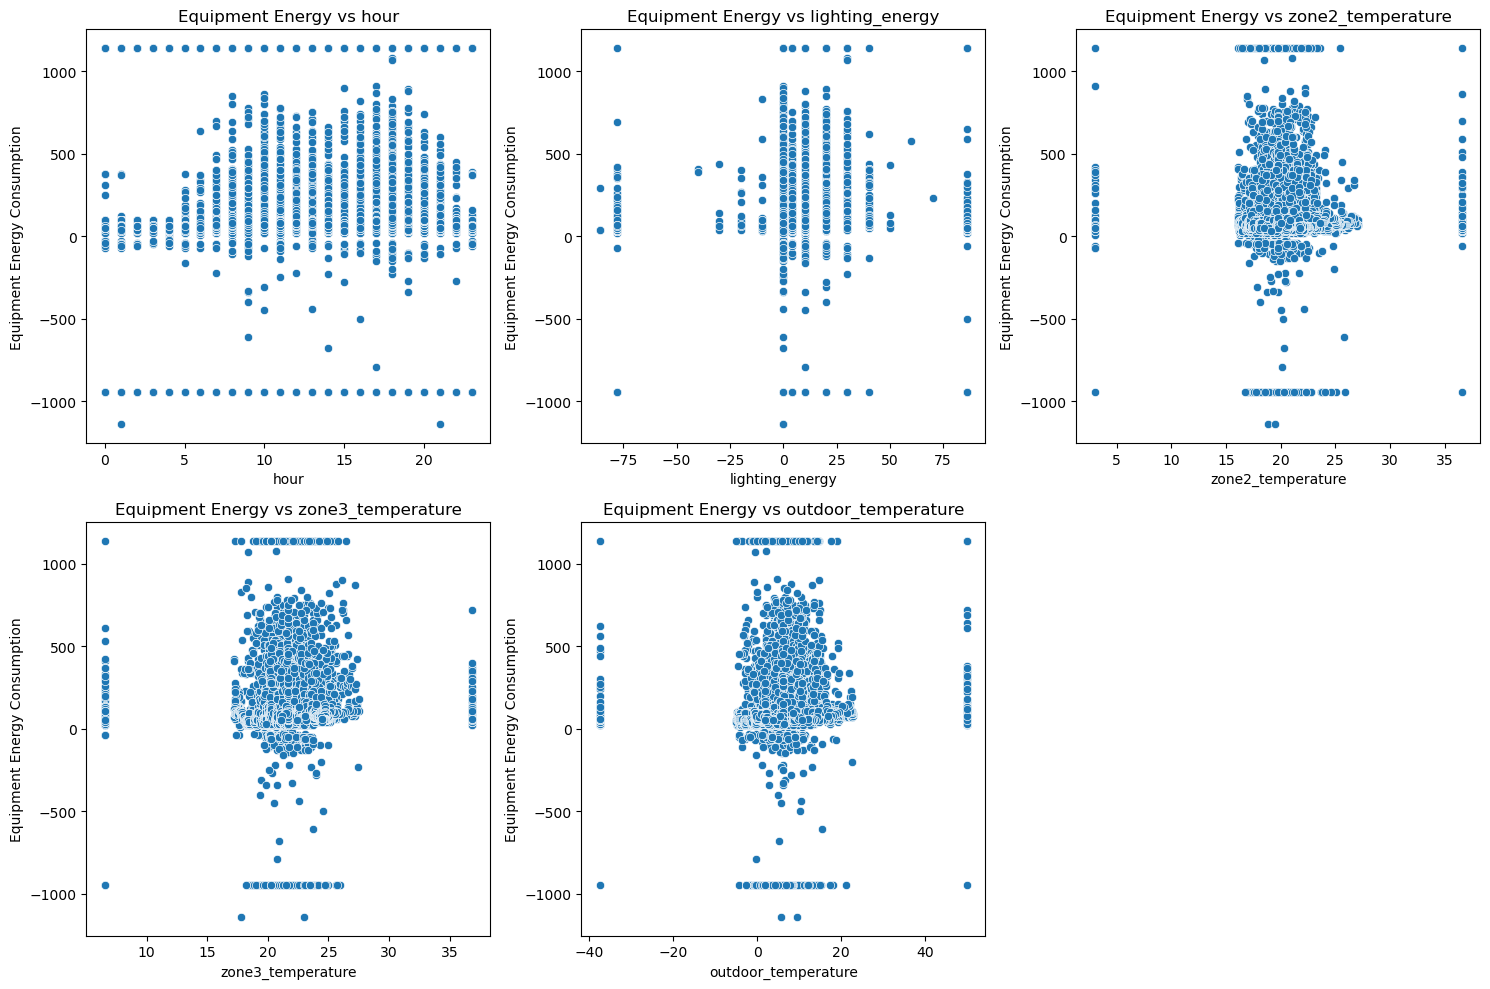

Scatter Plots Done.


### <span style="color:#003366; font-size:32px;">3.Feature Engineering</span>


In [39]:
print("\nStarting Feature Engineering...")
df_eng = df.copy()
features_created_summary = []

if 'timestamp' in df_eng.columns and pd.api.types.is_datetime64_any_dtype(
        df_eng['timestamp']):
    df_eng['hour_of_day'] = df_eng['timestamp'].dt.hour
    df_eng['day_of_week'] = df_eng['timestamp'].dt.dayofweek
    df_eng['month'] = df_eng['timestamp'].dt.month
    features_created_summary.append("time-based (hour, day, month)")
    print(
        "  - Created time-based features (hour_of_day, day_of_week, month) to capture potential "
        "temporal patterns in energy consumption.  For example, energy consumption might be higher "
        "during certain hours of the day, on weekdays compared to weekends, or in specific months."
    )

    temp_cols = [f'zone{i}_temperature' for i in range(1, 10)] + ['outdoor_temperature']
    interaction_created_flag = False
    for temp_col in temp_cols:
        if temp_col in df_eng.columns and pd.api.types.is_numeric_dtype(
                df_eng[temp_col]):
            df_eng[f'{temp_col}_x_hour'] = df_eng[temp_col] * df_eng['hour_of_day']
            interaction_created_flag = True
    if interaction_created_flag:
        features_created_summary.append("temperature-hour interactions")
        print(
            "  - Created interaction features between temperature and hour_of_day to model how the "
            "effect of temperature on energy consumption might vary throughout the day.  For instance, "
            "the impact of outdoor temperature on energy consumption might be different during the day "
            "when cooling systems are used more heavily compared to at night."
        )

if 'equipment_energy_consumption' in df_eng.columns and pd.api.types.is_numeric_dtype(
        df_eng['equipment_energy_consumption']):
    df_eng['energy_lag_24'] = df_eng['equipment_energy_consumption'].shift(24)
    df_eng['energy_rolling_24'] = df_eng['equipment_energy_consumption'].rolling(
        window=24, min_periods=1).mean()
    # fill the NaNs
    for col_fill in ['energy_lag_24', 'energy_rolling_24']:
        if col_fill in df_eng and df_eng[col_fill].isnull().any():
            df_eng[col_fill] = df_eng[col_fill].fillna(df_eng[col_fill].mean())
    features_created_summary.append("lagged/rolling energy features")
    print(
        "  - Created lagged (24-hour) and rolling (24-hour mean) energy consumption features.  "
        "The lagged feature captures the energy consumption from the same time yesterday, which can "
        "be useful for modeling daily patterns.  The rolling mean smooths out short-term fluctuations "
        "and provides a measure of recent energy consumption trends."
    )

if 'timestamp' in df_eng.columns:
    df_eng = df_eng.drop(columns=['timestamp'])  # Drop original timestamp

binned_cols_converted = 0
for col in df_eng.columns:  # Convert binned categories to codes
    if df_eng[col].dtype.name == 'category' and '_bin' in col:
        df_eng[col] = df_eng[col].cat.codes
        binned_cols_converted += 1
if binned_cols_converted > 0:
    features_created_summary.append(f"{binned_cols_converted} binned cols to codes")
    print(
        f"  - Converted {binned_cols_converted} binned categorical columns to numerical codes using "
        "pd.Categorical.codes.  This is necessary for using these features in most machine learning models."
    )
# fill the remaining NaNs
df_eng = df_eng.fillna(df_eng.mean(numeric_only=True))
print("  - Remaining NaN values in numeric columns (if any) imputed with the column mean.")

if features_created_summary:
    print(f"  - Created features: {'; '.join(features_created_summary)}.")
else:
    print("  - No new features were explicitly created in this step.")
print("Feature Engineering Done!")



Starting Feature Engineering...
  - Created lagged (24-hour) and rolling (24-hour mean) energy consumption features.  The lagged feature captures the energy consumption from the same time yesterday, which can be useful for modeling daily patterns.  The rolling mean smooths out short-term fluctuations and provides a measure of recent energy consumption trends.
  - Remaining NaN values in numeric columns (if any) imputed with the column mean.
  - Created features: lagged/rolling energy features.
Feature Engineering Done!


### <span style="color:#003366; font-size:32px;">4.Model developement and Evaluation</span>



Starting Feature Selection...


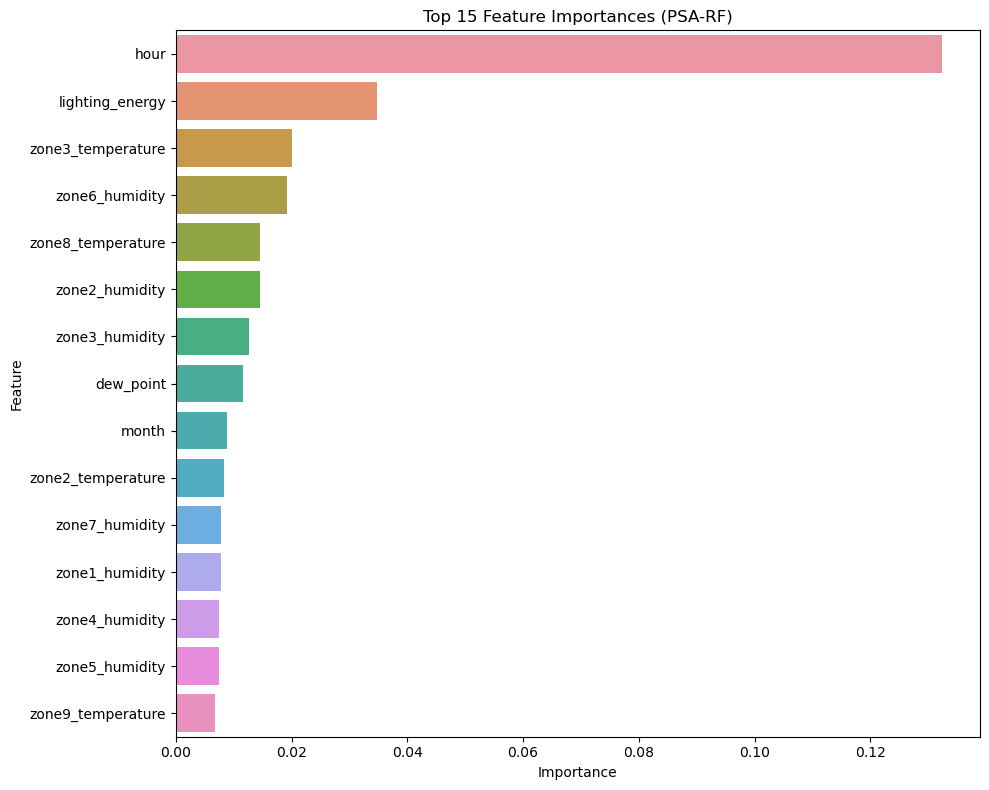

  - Permutation Importance using Random Forest (PSA-RF) was used for feature selection.  This method measures the decrease in model performance (R^2) when a feature's values are randomly shuffled.  Features with higher importance scores are more influential in the model's predictions.  The top 15 most important features are visualized in the plot.
  - Selected 22 features via PSA-RF: ['hour', 'lighting_energy', 'zone3_temperature', 'zone6_humidity', 'zone8_temperature', 'zone2_humidity', 'zone3_humidity', 'dew_point', 'month', 'zone2_temperature', 'zone7_humidity', 'zone1_humidity', 'zone4_humidity', 'zone5_humidity', 'zone9_temperature', 'zone4_temperature', 'zone9_humidity', 'atmospheric_pressure', 'zone7_temperature', 'zone8_humidity', 'zone6_temperature', 'day_of_week']
Feature Selection Done!
                     hour  lighting_energy  zone3_temperature  zone6_humidity  \
timestamp                                                                       
2016-01-11 17:00:00    17    

In [50]:
"""
Performs feature selection using Permutation Importance with detailed explanation and handling of edge cases.
"""
print("\nStarting Feature Selection...")
RANDOM_STATE = 42  # Define RANDOM_STATE
target_column = 'equipment_energy_consumption'  # Define target_column
# output_pdf_path = 'feature_selection_plots.pdf' # Removed
if target_column not in df.columns:
    print(
        f"  - Target column '{target_column}' not found in DataFrame.  Feature selection cannot be performed."
        "  Returning the original dataframe."
    )
    # return df  # Removed return, will handle outside
    selected_df = df.copy()

else:

    X = df.drop(columns=[target_column], errors='ignore')
    y = df[target_column]

    # Ensure X is numeric and handle NaNs
    X = X.select_dtypes(include=np.number).dropna(axis=1,
                                                    how='all')  # Keep only numeric, non-all-NaN columns
    X = X.fillna(X.mean())
    if X.empty:
        print(
            "  - No numeric features available after selection and NaN handling.  Feature selection cannot be performed."
            "  Returning the original dataframe."
        )
        # return df
        selected_df = df.copy()
    else:

        y = y.reindex(X.index)  # Align y with X's index
        if y.isnull().any():
            y = y.fillna(y.mean())  # Fill NaNs in y
        from sklearn.model_selection import train_test_split
        X_train, X_test_perm, y_train, y_test_perm = train_test_split(X, y, test_size=0.2,
                                                                        random_state=RANDOM_STATE)
        if X_train.empty or X_test_perm.empty:
            print(
                "  - Not enough data for feature selection split (train or test set is empty).  Feature selection"
                " cannot be performed.  Returning the original dataframe."
            )
            # return df
            selected_df = df.copy()
        else:
            # from matplotlib.backends.backend_pdf import PdfPages # Removed
            from sklearn.ensemble import RandomForestRegressor
            from sklearn.inspection import permutation_importance
            import matplotlib.pyplot as plt
            import seaborn as sns

            # with PdfPages(output_pdf_path) as pdf: # Removed
            model_rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1,
                                                n_estimators=50)  # Reduced estimators for speed
            model_rf.fit(X_train, y_train)
            result = permutation_importance(model_rf, X_test_perm, y_test_perm,
                                                n_repeats=5, random_state=RANDOM_STATE,
                                                n_jobs=-1, scoring='r2')

            feature_importance_df = pd.DataFrame(
                {'Feature': X.columns, 'Importance': result.importances_mean}).sort_values(
                by='Importance', ascending=False)

            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
            plt.title('Top 15 Feature Importances (PSA-RF)')
            plt.tight_layout()
            # pdf.savefig() # Removed
            plt.show()  # Added
            plt.close()
            # pdf.close() # Removed
            print(
                "  - Permutation Importance using Random Forest (PSA-RF) was used for feature selection.  "
                "This method measures the decrease in model performance (R^2) when a feature's values are "
                "randomly shuffled.  Features with higher importance scores are more influential in the model's "
                "predictions.  The top 15 most important features are visualized in the plot."
            )

            selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.001]['Feature'].tolist()
            if not selected_features:
                top_n = min(10, len(X.columns))
                selected_features = feature_importance_df['Feature'].head(
                    top_n).tolist()  # Select top N features
                print(
                    f"  - No features met importance threshold > 0.001.  Selected top {top_n} features based on "
                    "permutation importance.  This can happen if all features have weak predictive power."
                )
            else:
                print(
                    f"  - Selected {len(selected_features)} features via PSA-RF: {selected_features}"
                )
            selected_df =  X[selected_features]
    
print("Feature Selection Done!")
print(selected_df)


In [54]:
"""
Trains and evaluates a regression model (Random Forest or Gradient Boosting) 
Prints detailed results, including cross-validation performance and test set performance.
"""
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def cross_validate_model(model, X, y, cv=5):
    """
    Performs cross-validation and returns the mean R2 and MSE.

    Args:
        model: The regression model to cross-validate.
        X: The input features.
        y: The target variable.
        cv: Number of cross-validation folds (default: 5).

    Returns:
        A dictionary containing the mean R2 and MSE across the folds.
    """
    cv_results = cross_validate(model, X, y, cv=cv, scoring=['r2', 'neg_mean_squared_error'])
    r2_mean = np.mean(cv_results['test_r2'])
    mse_mean = -np.mean(cv_results['test_neg_mean_squared_error'])  # Convert back to positive MSE
    return {'r2_mean': r2_mean, 'mse_mean': mse_mean}



model_type = 'random_forest' # Define model_type
print(f"\n--- Training and Evaluating: {model_type} ---")

# Use the existing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
if X_train.empty or X_test.empty:
    print(f"  - Not enough data for training/testing {model_type}. Skipping model.")
    # return None, None  # Removed return
    best_model = None
    test_results = None
else:
    if model_type == 'random_forest':
        base_model = RandomForestRegressor(random_state=RANDOM_STATE)
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None],
                      'min_samples_split': [2, 4, 8]}  # Expanded grid
    elif model_type == 'gradient_boosting':
        base_model = GradientBoostingRegressor(random_state=RANDOM_STATE)
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1],
                      'max_depth': [3, 5, 7]}  # Expanded grid
    else:
        raise ValueError(
            f"Invalid model_type: {model_type}. Must be 'random_forest' or 'gradient_boosting'.")

    # Perform cross-validation *before* grid search to get a baseline
    print("  - Performing cross-validation on the base model (before tuning):")
    cv_results_before = cross_validate_model(base_model, X_train, y_train)

    # Grid Search for hyperparameter tuning
    print("  - Performing Grid Search for hyperparameter tuning...")
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='r2',
                                    verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"  - Best Hyperparameters for {model_type}: {grid_search.best_params_}")

    # Perform cross-validation on the best model
    print("  - Performing cross-validation on the best model (after tuning):")
    cv_results_after = cross_validate_model(best_model, X_train, y_train)

    # Evaluate on the test set
    y_pred_test = best_model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    print(f"\n  - {model_type.capitalize()} Model Evaluation Results:")
    print(
        f"    - Cross-Validation Results (Before Tuning): R2 (mean): {cv_results_before['r2_mean']:.4f}, MSE (mean): {cv_results_before['mse_mean']:.2f}")
    print(
        f"    - Cross-Validation Results (After Tuning):  R2 (mean): {cv_results_after['r2_mean']:.4f}, MSE (mean): {cv_results_after['mse_mean']:.2f}")
    print(f"    - Test Set Performance:")
    print(f"      - RMSE: {rmse_test:.2f}")
    print(f"      - R2 Score: {r2_test:.4f}")
    print(f"      - MSE: {mse_test:.2f}")
    print(f"      - MAE: {mae_test:.2f}")

    test_results = {'r2': r2_test, 'mse': mse_test, 'mae': mae_test, 'rmse': rmse_test}
print(best_model, test_results)



--- Training and Evaluating: random_forest ---
  - Performing cross-validation on the base model (before tuning):
  - Performing Grid Search for hyperparameter tuning...
  - Best Hyperparameters for random_forest: {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 200}
  - Performing cross-validation on the best model (after tuning):

  - Random_forest Model Evaluation Results:
    - Cross-Validation Results (Before Tuning): R2 (mean): 0.0493, MSE (mean): 29872.46
    - Cross-Validation Results (After Tuning):  R2 (mean): 0.0698, MSE (mean): 29233.90
    - Test Set Performance:
      - RMSE: 171.93
      - R2 Score: 0.0815
      - MSE: 29560.99
      - MAE: 70.25
RandomForestRegressor(min_samples_split=8, n_estimators=200, random_state=42) {'r2': 0.08151630658812181, 'mse': 29560.990132637056, 'mae': 70.25285159337767, 'rmse': 171.93309783935453}
